# Multimodal Deep Learning for Recommendation (Hands-On Session)

⭐ **The 2024 ACM RecSys Summer School** ⭐

*Bari (Italy), October 09, 2024*

<div>
  <img src="https://recsys.acm.org/wp-content/uploads/2023/11/RecSysBanner_1000_180.png" alt="SisInfLab" width="600">
  <img src="https://recsys.acm.org/wp-content/uploads/2020/07/Recsys-OG.png" alt="recsys" width="200">
</div>

🧑 Instructor: [Daniele Malitesta](https://danielemalitesta.github.io/)

💳 Credits: I'd like to thank [Matteo Attimonelli](mailto:matteo.attimonelli@poliba.it), [Danilo Danese](mailto:danilo.danese@poliba.it), and [Angela Di Fazio](mailto:angela.difazio@poliba.it) for their massive and amazing job on making the code well-structured and work smoothly!

If you use this code for your experiments, please cite our recent work (on arXiv) 🙏

![GitHub Repo stars](https://img.shields.io/github/stars/sisinflab/Ducho-meets-Elliot)
 [![arXiv](https://img.shields.io/badge/arXiv-2409.15857-b31b1b.svg)](https://arxiv.org/abs/2409.15857)

 <img src="https://github.com/sisinflab/Ducho-meets-Elliot/blob/master/framework.png?raw=true"  width="700">

```
@article{DBLP:journals/corr/abs-2409-15857,
  author       = {Matteo Attimonelli and
                  Danilo Danese and
                  Angela Di Fazio and
                  Daniele Malitesta and
                  Claudio Pomo and
                  Tommaso Di Noia},
  title        = {Ducho meets Elliot: Large-scale Benchmarks for Multimodal Recommendation},
  journal      = {CoRR},
  volume       = {abs/2409.15857},
  year         = {2024}
}
```

## Clone the repository

First, we clone the repository to exploit the Ducho + Elliot experimental environment 🐑

In [1]:
!git clone --recursive https://github.com/sisinflab/Ducho-meets-Elliot.git
%cd Ducho-meets-Elliot/

Cloning into 'Ducho-meets-Elliot'...
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (603/603), done.
remote: Compressing objects: 100% (358/358), done.
remote: Total 603 (delta 178), reused 597 (delta 172), pack-reused 0 (from 0)
Receiving objects: 100% (603/603), 846.12 KiB | 2.78 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Submodule 'Ducho' (https://github.com/sisinflab/Ducho.git) registered for path 'Ducho'
Cloning into '/content/Ducho-meets-Elliot/Ducho'...
remote: Enumerating objects: 2333, done.        
remote: Counting objects: 100% (512/512), done.        
remote: Compressing objects: 100% (275/275), done.        
remote: Total 2333 (delta 271), reused 454 (delta 227), pack-reused 1821 (from 1)        
Receiving objects: 100% (2333/2333), 3.67 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (1273/1273), done.
Submodule path 'Ducho': checked out 'c93b44c9fcc5e89d07f3d21ebdcf95cd2e00a569'
/content/Ducho-meets-Elliot


## Set up the working environment

Now, we setup the proper environment to run the experiments. Conveniently, Google Colab provides most of the packages we need. Thus, we only install the remaining ones 😎

In [2]:
!pip install pandas loguru alive_progress sentence_transformers
!pip install torch_geometric
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!python -m pip install -U prettytable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 20.5 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=ae3e301a2921b5d589c314c715e25743a446ce93d239ab11c3264e3f24496600
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Download and visualize the multimodal recommendation datasets

We're now set to download the multimodal recommendation dataset. For the sake of this lecture, we consider the popular **[Amazon Product Reviews](https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews)** dataset 🛒

Specifically, we consider the following product categories:

| **Datasets**     | **# Users** | **# Items** | **# Interactions** | **Sparsity (%)** |
|------------------|-------------|-------------|--------------------|------------------|
| Office Products  | 4,471       | 1,703       | 20,608             | 99.73%           |
| Digital Music    | 5,082       | 2,338       | 30,623             | 99.74%           |
| Baby             | 19,100      | 6,283       | 80,931             | 99.93%           |
| Toys & Games     | 19,241      | 11,101      | 89,558             | 99.96%           |
| Beauty           | 21,752      | 11,145      | 100,834            | 99.96%           |

For the sake of this hands-on session, we will consider only the "Office Products" dataset!

In [ ]:
# RUN THIS CELL ONLY IF YOU HAVE TIME TO WASTE :-)

%cd Ducho
!python3 ./demos/demo_office/prepare_dataset.py

In [3]:
# OTHERWISE, HERE'S AN ALREADY-PREPARED VERSION OF THE DATASET

import gdown

%cd Ducho
!mkdir -p local/data
gdown.download(f'https://drive.google.com/uc?id=1DSe7osyJ5dmXRsgOkdDMPeHPHCk7eezv', 'demo_office.zip', quiet=False)
!mv demo_office.zip local/data/
!unzip local/data/demo_office.zip
%rm local/data/demo_office.zip

/content/Ducho-meets-Elliot/Ducho


Downloading...
From (original): https://drive.google.com/uc?id=1DSe7osyJ5dmXRsgOkdDMPeHPHCk7eezv
From (redirected): https://drive.google.com/uc?id=1DSe7osyJ5dmXRsgOkdDMPeHPHCk7eezv&confirm=t&uuid=e2d6e49b-006c-4e23-955b-81587e958bfc
To: /content/Ducho-meets-Elliot/Ducho/demo_office.zip
100%|██████████| 83.5M/83.5M [00:00<00:00, 131MB/s]


Archive:  local/data/demo_office.zip
   creating: local/data/demo_office/
  inflating: local/data/demo_office/original_meta.tsv  
  inflating: local/data/demo_office/missing_textual.tsv  
   creating: local/data/demo_office/images/
  inflating: local/data/demo_office/images/B002UKOKHM.jpg  
  inflating: local/data/demo_office/images/B003CIDSHO.jpg  
  inflating: local/data/demo_office/images/B003F0QLAU.jpg  
  inflating: local/data/demo_office/images/B001XM9BV8.jpg  
  inflating: local/data/demo_office/images/B001NIIDI4.jpg  
  inflating: local/data/demo_office/images/B0019L0X38.jpg  
  inflating: local/data/demo_office/images/B000LYCUF8.jpg  
  inflating: local/data/demo_office/images/B00134LO3E.jpg  
  inflating: local/data/demo_office/images/B001R4C5BK.jpg  
  inflating: local/data/demo_office/images/B0085IQ05I.jpg  
  inflating: local/data/demo_office/images/B003LD08TG.jpg  
  inflating: local/data/demo_office/images/B00006IC8I.jpg  
  inflating: local/data/demo_office/images/B003W

We can visualize one random item from the dataset 👓

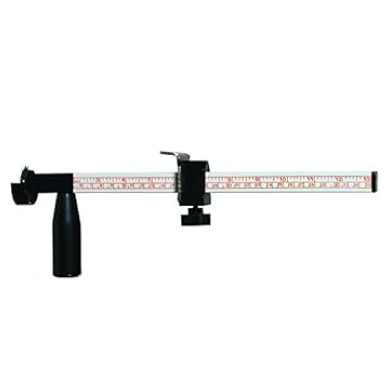

+----------------+--------+
|      USER      | Rating |
+----------------+--------+
| A2S0D2B1OQ06VI |  5.0   |
| A34U4Y40W1GW9I |  5.0   |
| A276WUJIHO08N7 |  1.0   |
| A2V5UI37R7ESEV |  5.0   |
| A2HPA8TY1FH40A |  3.0   |
| A3V9K8LW3XHFJG |  4.0   |
+----------------+--------+


In [4]:
import pandas as pd
import random
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display, HTML

meta = pd.read_csv('local/data/demo_office/meta.tsv', sep='\t')
random_item = random.choice(meta['asin'].tolist())
description = meta[meta["asin"]==random_item]["description"].values[0]
display(HTML(f"ASIN: {random_item}\n<div style='white-space: pre-wrap; width: 100%;'>{description}</div>"))
img = Image.open(f'local/data/demo_office/images/{random_item}.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ["USER", "Rating"]
reviews = pd.read_csv('local/data/demo_office/reviews.tsv', sep='\t', header=None)
current_reviews = reviews[reviews[1]==random_item]

for idx, row in current_reviews.iterrows():
  table.add_row([row[0], row[2]])

display(HTML('Clicked by:'))
print(table)

## Check if GPU is available

Before running any GPU-bound process, let's check if the GPU is available:

In [5]:
!nvidia-smi
!nvcc --version

Wed Oct  9 14:10:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Extract multimodal features with Ducho

![GitHub Repo stars](https://img.shields.io/github/stars/sisinflab/Ducho)
 [![arXiv](https://img.shields.io/badge/arXiv-2403.04503-b31b1b.svg)](https://arxiv.org/abs/2403.04503)

 If you use Ducho for your experiments, please cite our papers 🙏

<div>
  <img src="https://github.com/sisinflab/Ducho/raw/main/docs/source/img/ducho_v2_overview.png" alt="duccio" width="800">
</div>

```
@inproceedings{DBLP:conf/www/AttimonelliDMPG24,
  author       = {Matteo Attimonelli and
                  Danilo Danese and
                  Daniele Malitesta and
                  Claudio Pomo and
                  Giuseppe Gassi and
                  Tommaso Di Noia},
  title        = {Ducho 2.0: Towards a More Up-to-Date Unified Framework for the Extraction
                  of Multimodal Features in Recommendation},
  booktitle    = {{WWW} (Companion Volume)},
  pages        = {1075--1078},
  publisher    = {{ACM}},
  year         = {2024}
}
```

```
@inproceedings{DBLP:conf/mm/MalitestaGPN23,
  author       = {Daniele Malitesta and
                  Giuseppe Gassi and
                  Claudio Pomo and
                  Tommaso Di Noia},
  title        = {Ducho: {A} Unified Framework for the Extraction of Multimodal Features
                  in Recommendation},
  booktitle    = {{ACM} Multimedia},
  pages        = {9668--9671},
  publisher    = {{ACM}},
  year         = {2023}
}
```

Now, we are all set to extract multimodal product features through Ducho 🦾

In [6]:
# CREATE THE CONFIGURATION FILE FOR DUCHO
def create_config():
  import yaml

  config_ducho = """dataset_path: ./local/data/demo_office
gpu list: 0
visual:
    items:
        input_path: images
        output_path: visual_embeddings_32
        model: [
            { model_name: ResNet50,
              output_layers: avgpool,
              reshape: [224, 224],
              preprocessing: zscore,
              backend: torch,
              batch_size: 32
            }
        ]

textual:
    items:
        input_path: meta.tsv
        item_column: asin
        text_column: description
        output_path: textual_embeddings_32
        model: [
          { model_name: sentence-transformers/all-mpnet-base-v2,
              output_layers: 1,
              clear_text: False,
              backend: sentence_transformers,
              batch_size: 32
          }
        ]

visual_textual:
    items:
        input_path: {visual: images, textual: meta.tsv}
        item_column: asin
        text_column: description
        output_path: {visual: visual_embeddings_32, textual: textual_embeddings_32}
        model: [
          { model_name: openai/clip-vit-base-patch16,
              backend: transformers,
              output_layers: 1,
              batch_size: 32
          }
        ]

  """

  ducho_dir = f"demos/demo_office/config.yml"
  with open(ducho_dir, 'w') as conf_file:
      conf_file.write(config_ducho)

# RUN THE EXTRACTION WITH DUCHO
from ducho.runner.Runner import MultimodalFeatureExtractor
import torch
import os
import numpy as np
import random

def set_seed(seed = 42):
    """Set all seeds to make results reproducible (deterministic mode).
       When seed is None, disables deterministic mode.
    :param seed: an integer to your choosing
    """
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['CUBLAS_WORKSPACE_CONFIG'] = ":16:8"


def main():
    set_seed()
    extractor_obj = MultimodalFeatureExtractor(config_file_path='./demos/demo_office/config.yml')
    extractor_obj.execute_extractions()


if __name__ == '__main__':
    create_config()
    main()

2024-10-09 14:14:51.579 | INFO     | ducho.runner.Runner:__init__:184 - 

      ██████╗  ██╗   ██╗  ██████╗ ██╗  ██╗  ██████╗ 
      ██╔══██╗ ██║   ██║ ██╔════╝ ██║  ██║ ██╔═══██╗
      ██║  ██║ ██║   ██║ ██║      ███████║ ██║   ██║
      ██║  ██║ ██║   ██║ ██║      ██╔══██║ ██║   ██║
      ██████╔╝ ╚██████╔╝ ╚██████╗ ██║  ██║ ╚██████╔╝
      ╚═════╝   ╚═════╝   ╚═════╝ ╚═╝  ╚═╝  ╚═════╝   v2.0 

2024-10-09 14:14:51.581 | WELCOME  | ducho.runner.Runner:__init__:185 - ***  Ducho 2.0: Towards a More Up-to-Date Unified Framework for the Extraction of Multimodal Features in Recommendation ***
2024-10-09 14:14:51.585 | WELCOME  | ducho.runner.Runner:__init__:187 - *** Brought to you by: SisInfLab, Politecnico di Bari, Italy (https://sisinflab.poliba.it) ***

2024-10-09 14:14:51.594 | WARNING  | ducho.config.Config:__init__:73 - Custom configuration file ./demos/demo_office/config.yml provided. Will override the default one
2024-10-09 14:14:51.597 | INFO     | ducho.config.Config:__init__:83

|████████████████████████████████████████| 54/54 [100%] in 26.0s (2.07/s) 


2024-10-09 14:15:21.496 | SUCCESS  | ducho.runner.Runner:_execute_extraction_from_models_list:144 - Extraction with layer: ResNet50.avgpool has been completed in 26.1 seconds!
2024-10-09 14:15:21.497 | SUCCESS  | ducho.runner.Runner:_execute_extraction_from_models_list:146 - Extraction with model: ResNet50 is complete
2024-10-09 14:15:21.571 | INFO     | ducho.runner.Runner:do_extraction:231 - Extraction on items for textual modality
2024-10-09 14:15:21.575 | INFO     | ducho.internal.father_classes.DatasetFather:__init__:41 - Reading files from: /content/Ducho-meets-Elliot/Ducho/local/data/demo_office/meta.tsv
2024-10-09 14:15:21.577 | INFO     | ducho.internal.father_classes.DatasetFather:__init__:44 - Output directory does not exist. Will create it in: /content/Ducho-meets-Elliot/Ducho/local/data/demo_office/textual_embeddings_32
2024-10-09 14:15:22.123 | INFO     | ducho.runner.Runner:_execute_extraction_from_models_list:41 - Extraction model: sentence-transformers/all-mpnet-base-v

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-10-09 14:15:28.962 | INFO     | ducho.runner.Runner:_execute_extraction_from_models_list:90 - Extraction layer: sentence-transformers/all-mpnet-base-v2.1


|████████████████████████████████████████| 54/54 [100%] in 38.3s (1.41/s) 


2024-10-09 14:16:07.321 | SUCCESS  | ducho.runner.Runner:_execute_extraction_from_models_list:144 - Extraction with layer: sentence-transformers/all-mpnet-base-v2.1 has been completed in 38.36 seconds!
2024-10-09 14:16:07.324 | SUCCESS  | ducho.runner.Runner:_execute_extraction_from_models_list:146 - Extraction with model: sentence-transformers/all-mpnet-base-v2 is complete
2024-10-09 14:16:07.350 | INFO     | ducho.runner.Runner:do_extraction:231 - Extraction on items for visual_textual modality
2024-10-09 14:16:07.352 | INFO     | ducho.internal.father_classes.DatasetFather:__init__:41 - Reading files from: /content/Ducho-meets-Elliot/Ducho/local/data/demo_office/images
2024-10-09 14:16:07.353 | WARNING  | ducho.internal.father_classes.DatasetFather:__init__:47 - The output directory already exists. This extraction could overwrite existing files!
2024-10-09 14:16:07.364 | INFO     | ducho.internal.father_classes.DatasetFather:__init__:41 - Reading files from: /content/Ducho-meets-Ell

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

2024-10-09 14:16:13.016 | INFO     | ducho.runner.Runner:_execute_extraction_from_models_list:90 - Extraction layer: openai/clip-vit-base-patch16.1


|████████████████████████████████████████| 54/54 [100%] in 23.9s (2.26/s) 


2024-10-09 14:16:36.994 | SUCCESS  | ducho.runner.Runner:_execute_extraction_from_models_list:144 - Extraction with layer: openai/clip-vit-base-patch16.1 has been completed in 23.98 seconds!
2024-10-09 14:16:36.996 | SUCCESS  | ducho.runner.Runner:_execute_extraction_from_models_list:146 - Extraction with model: openai/clip-vit-base-patch16 is complete
2024-10-09 14:16:37.028 | SUCCESS  | ducho.runner.Runner:execute_extractions:224 - Extraction is complete, it's coffee break! ☕️


## Dataset splitting and features mapping in Elliot

![GitHub Repo stars](https://img.shields.io/github/stars/sisinflab/Formal-Multimod-Rec)
 [![arXiv](https://img.shields.io/badge/arXiv-2309.05273-b31b1b.svg)](https://arxiv.org/abs/2309.05273)

If everything went smoothly with the features extraction, now we can: (i) split the original dataset into train/validation/test set ✂ (ii) map the multimodal item features to ids aligned with the training set 🗾

To this end, we will use Elliot, our framework for rigorous and reproducibile recommender systems evaluation.

If you find it useful for your research, please cite our works 🙏



```
@article{10.1145/3662738,
author = {Malitesta, Daniele and Cornacchia, Giandomenico and Pomo, Claudio and Merra, Felice Antonio and Di Noia, Tommaso and Di Sciascio, Eugenio},
title = {Formalizing Multimedia Recommendation through Multimodal Deep Learning},
year = {2024},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3662738},
doi = {10.1145/3662738},
note = {Just Accepted},
journal = {ACM Trans. Recomm. Syst.},
month = {apr},
keywords = {Multimodal Deep Learning, Multimedia Recommender Systems, Benchmarking}
}
```



```
@inproceedings{DBLP:conf/sigir/AnelliBFMMPDN21,
  author       = {Vito Walter Anelli and
                  Alejandro Bellog{\'{\i}}n and
                  Antonio Ferrara and
                  Daniele Malitesta and
                  Felice Antonio Merra and
                  Claudio Pomo and
                  Francesco Maria Donini and
                  Tommaso Di Noia},
  title        = {Elliot: {A} Comprehensive and Rigorous Framework for Reproducible
                  Recommender Systems Evaluation},
  booktitle    = {{SIGIR}},
  pages        = {2405--2414},
  publisher    = {{ACM}},
  year         = {2021}
}
```



**Dataset splitting**

* Train = 80% dataset

* Test = 20% dataset

* Valid = 10% train set

In [7]:
%cd ..

%mv ./Ducho/local/data/demo_office/visual_embeddings_32 ./data/office
%mv ./Ducho/local/data/demo_office/textual_embeddings_32 ./data/office

%cp ./Ducho/local/data/demo_office/reviews.tsv ./data/office

split_config = '''
experiment:
  backend: pytorch
  data_config:
    strategy: dataset
    dataset_path: ../data/office/reviews.tsv
  splitting:
    save_on_disk: True
    save_folder: ../data/office_splits/
    test_splitting:
      strategy: random_subsampling
      test_ratio: 0.2
    validation_splitting:
      strategy: random_subsampling
      test_ratio: 0.1
  dataset: office
  top_k: 20
  evaluation:
    cutoffs: [ 10, 20 ]
    simple_metrics: [ Recall, nDCG ]
  gpu: 0
  external_models_path: ../external/models/__init__.py
  models:
    MostPop:
      meta:
        verbose: True
        save_recs: False
'''

split_dir = f"./config_files/split_office.yml"
with open(split_dir, 'w') as conf_file:
    conf_file.write(split_config)

# SPLIT INTO TRAIN/VAL/TEST
%env CUBLAS_WORKSPACE_CONFIG=:16:8
!python3 run_split.py --dataset office

%cd ./data/office

%env CUBLAS_WORKSPACE_CONFIG=:16:8

# MAP ITEMS TO NUMERICAL IDS
train = pd.read_csv('train.tsv', sep='\t', header=None)
val = pd.read_csv('val.tsv', sep='\t', header=None)
test = pd.read_csv('test.tsv', sep='\t', header=None)

df = pd.concat([train, val, test], axis=0)

users = df[0].unique()
items = df[1].unique()

users_map = {u: idx for idx, u in enumerate(users)}
items_map = {i: idx for idx, i in enumerate(items)}

train[0] = train[0].map(users_map)
train[1] = train[1].map(items_map)

val[0] = val[0].map(users_map)
val[1] = val[1].map(items_map)

test[0] = test[0].map(users_map)
test[1] = test[1].map(items_map)

train.to_csv('train_indexed.tsv', sep='\t', index=False, header=None)
val.to_csv('val_indexed.tsv', sep='\t', index=False, header=None)
test.to_csv('test_indexed.tsv', sep='\t', index=False, header=None)

visual_embeddings_folder = f'visual_embeddings_32/torch/ResNet50/avgpool'
textual_embeddings_folder = f'textual_embeddings_32/sentence_transformers/sentence-transformers/all-mpnet-base-v2/1'

visual_embeddings_folder_indexed = f'visual_embeddings_indexed_32/torch/ResNet50/avgpool'
textual_embeddings_folder_indexed = f'textual_embeddings_indexed_32/sentence_transformers/sentence-transformers/all-mpnet-base-v2/1'

if not os.path.exists(visual_embeddings_folder_indexed):
    os.makedirs(visual_embeddings_folder_indexed)

if not os.path.exists(textual_embeddings_folder_indexed):
    os.makedirs(textual_embeddings_folder_indexed)

for key, value in items_map.items():
    np.save(f'{visual_embeddings_folder_indexed}/{value}.npy', np.load(f'{visual_embeddings_folder}/{key}.npy'))
    np.save(f'{textual_embeddings_folder_indexed}/{value}.npy', np.load(f'{textual_embeddings_folder}/{key}.npy'))


visual_embeddings_folder = f'visual_embeddings_32/transformers/openai/clip-vit-base-patch16/1'
textual_embeddings_folder = f'textual_embeddings_32/transformers/openai/clip-vit-base-patch16/1'

visual_embeddings_folder_indexed = f'visual_embeddings_indexed_32/transformers/openai/clip-vit-base-patch16/1'
textual_embeddings_folder_indexed = f'textual_embeddings_indexed_32/transformers/openai/clip-vit-base-patch16/1'

if not os.path.exists(visual_embeddings_folder_indexed):
    os.makedirs(visual_embeddings_folder_indexed)

if not os.path.exists(textual_embeddings_folder_indexed):
    os.makedirs(textual_embeddings_folder_indexed)

for key, value in items_map.items():
    np.save(f'{visual_embeddings_folder_indexed}/{value}.npy', np.load(f'{visual_embeddings_folder}/{key}.npy'))
    np.save(f'{textual_embeddings_folder_indexed}/{value}.npy', np.load(f'{textual_embeddings_folder}/{key}.npy'))


%cd ../../

/content/Ducho-meets-Elliot
env: CUBLAS_WORKSPACE_CONFIG=:16:8


  /\\\\\\\\\\\\\\\   /\\\\\\      /\\\\\\                         Version: 0.3.1                              
  \/\\\///////////   \////\\\     \////\\\                                           
   \/\\\                 \/\\\        \/\\\      /\\\                     /\\\       
    \/\\\\\\\\\\\         \/\\\        \/\\\     \///       /\\\\\      /\\\\\\\\\\\     
     \/\\\///////          \/\\\        \/\\\      /\\\    /\\\///\\\   \////\\\////     
      \/\\\                 \/\\\        \/\\\     \/\\\   /\\\  \//\\\     \/\\\    
       \/\\\                 \/\\\        \/\\\     \/\\\  \//\\\  /\\\      \/\\\ /\\   
        \/\\\\\\\\\\\\\\\   /\\\\\\\\\   /\\\\\\\\\  \/\\\   \///\\\\\/       \//\\\\\  
         \///////////////   \/////////   \/////////   \///      \/////          \/////    
         
2024-10-09 14:18:58.144384: I Start experiment
2024-10-09 14:18:58.211281: I There will be the splitting
F

The downloaded multimodal dataset has the following structure:

```
├── office
│   ├── visual_embeddings_indexed_32
|       ├── torch
|          ├── ResNet50
|             ├── avgpool
│                ├── 0.npy
│                ├── 1.npy
│                ├── ...
|       ├── transformers
|          ├── openai
|             ├── clip-vit-base-patch16
|                ├── 1
│                   ├── 0.npy
│                   ├── 1.npy
│                   ├── ...
|
│   ├── textual_embeddings_indexed_32
|       ├── sentence_transformers
|          ├── sentence-transformers
|             ├── all-mpnet-base-v2
|                ├── 1
│                   ├── 0.npy
│                   ├── 1.npy
│                   ├── ...
|       ├── transformers
|          ├── openai
|             ├── clip-vit-base-patch16
|                ├── 1
│                   ├── 0.npy
│                   ├── 1.npy
│                   ├── ...
│   ├── train_indexed.tsv
│   ├── val_indexed.tsv
│   ├── test_indexed.tsv
```



## Configure and run the experiments
Let's set the hyper-parameters for the model to be trained and tested. We will focus on VBPR in a modified version which adopts multimodal features. We train and evaluate it on Amazon Office.

### First multimodal features configuration

We start with the configuration ResNet50 (visual) + SentenceBert (textual), the most common one from the literature.

In [8]:
import yaml

config_filename = 'hands-on_resnet50_sentencebert'
elliot_config_1 = {
  'experiment': {
    'backend': 'pytorch',
    'data_config': {
      'strategy': 'fixed',
      'train_path': '../data/{0}/train_indexed.tsv',
      'validation_path': '../data/{0}/val_indexed.tsv',
      'test_path': '../data/{0}/test_indexed.tsv',
      'side_information': [
        {
            'dataloader': 'VisualAttribute',
            'visual_features': '../data/{0}/visual_embeddings_indexed_32/torch/ResNet50/avgpool'
        },
        {
            'dataloader': 'TextualAttribute',
            'textual_features': '../data/{0}/textual_embeddings_indexed_32/sentence_transformers/sentence-transformers/all-mpnet-base-v2/1'
        }
      ]
    },
    'dataset': 'office',
    'top_k': 20,
    'evaluation': {
      'cutoffs': [20],
      'simple_metrics': ['Recall', 'Precision', 'nDCG', 'HR']
    },
    'gpu': 0,
    'external_models_path': '../external/models/__init__.py',
    'models': {
      'external.VBPR': {
        'meta': {
          'hyper_opt_alg': 'grid',
          'verbose': True,
          'save_weights': False,
          'save_recs': False,
          'validation_rate': 10,
          'validation_metric': 'Recall@20',
          'restore': False
        },
        'epochs': 200,
        'batch_size': 1024,
        'factors': 64,
        'lr': 0.005,
        'l_w': 1e-5,
        'n_layers': 1,
        'comb_mod': 'concat',
        'modalities': "('visual','textual')",
        'loaders': "('VisualAttribute','TextualAttribute')",
        'seed': 123
      }
    }
  }
}

with open(f'config_files/{config_filename}.yml', 'w') as file:
    documents = yaml.dump(elliot_config_1, file)

### Run Elliot

Now we are all set to run an experiment with VBPR on Amazon Office with the first multimodal configuration.

In [9]:
from elliot.run import run_experiment

run_experiment(f"config_files/hands-on_resnet50_sentencebert.yml")



  /\\\\\\\\\\\\\\\   /\\\\\\      /\\\\\\                         Version: 0.3.1                              
  \/\\\///////////   \////\\\     \////\\\                                           
   \/\\\                 \/\\\        \/\\\      /\\\                     /\\\       
    \/\\\\\\\\\\\         \/\\\        \/\\\     \///       /\\\\\      /\\\\\\\\\\\     
     \/\\\///////          \/\\\        \/\\\      /\\\    /\\\///\\\   \////\\\////     
      \/\\\                 \/\\\        \/\\\     \/\\\   /\\\  \//\\\     \/\\\    
       \/\\\                 \/\\\        \/\\\     \/\\\  \//\\\  /\\\      \/\\\ /\\   
        \/\\\\\\\\\\\\\\\   /\\\\\\\\\   /\\\\\\\\\  \/\\\   \///\\\\\/       \//\\\\\  
         \///////////////   \/////////   \/////////   \///      \/////          \/////    
         
2024-10-09 14:23:41.069744: I Start experiment
2024-10-09 14:23:41.092616: I /content/Ducho-meets-Elliot/data/office/train_indexed.tsv - Loaded
2024-10-09 14:23:41.13897

2024-10-09 14:23:41.382371: W WARNING: Your Python version is lower than 3.8. Consequently, Custom class objects created in Side Information Namespace will be created swallowly!!!!
2024-10-09 14:23:41.400395: W WARNING: Your Python version is lower than 3.8. Consequently, Custom class objects created in Side Information Namespace will be created swallowly!!!!
2024-10-09 14:23:41.643317: I Statistics	Users:	4471	Items:	1703	Transactions:	20608	Sparsity:	0.9972934470502343
2024-10-09 14:23:43.434487: I Training begun for VBPR

2024-10-09 14:23:43.434357: I Loading parameters
2024-10-09 14:23:43.436127: I Hyperparameters:
2024-10-09 14:23:43.437858: I batch_size set to 1024
2024-10-09 14:23:43.441070: I Parameter factors set to 64
2024-10-09 14:23:43.441262: I comb_mod set to concat
2024-10-09 14:23:43.442219: I epochs set to 200
2024-10-09 14:23:43.443312: I factors set to 64
2024-10-09 14:23:43.444350: I l_w set to 1e-05
2024-10-09 14:23:43.445343: I loaders set to ('VisualAttribute','T

21it [00:00, 24.47it/s, loss=0.67172]                        
21it [00:00, 58.69it/s, loss=0.59717]                        
21it [00:00, 61.22it/s, loss=0.51057]                        
21it [00:00, 51.43it/s, loss=0.40251]                        
21it [00:00, 55.57it/s, loss=0.31720]                        
21it [00:00, 58.86it/s, loss=0.24316]                        
21it [00:00, 55.07it/s, loss=0.19174]                        
21it [00:00, 59.36it/s, loss=0.14822]                        
21it [00:00, 55.10it/s, loss=0.12053]                        
21it [00:00, 53.71it/s, loss=0.09829]                        


2024-10-09 14:23:48.536085: I 
2024-10-09 14:23:48.553181: I Validation Evaluation results
2024-10-09 14:23:48.559314: I Cut-off: 20
2024-10-09 14:23:48.594780: I Eval Time: 0.18200159072875977
2024-10-09 14:23:48.596344: I Results
2024-10-09 14:23:48.597419: I Recall	0.04333
2024-10-09 14:23:48.598959: I Precision	0.00265
2024-10-09 14:23:48.600886: I nDCG	0.01776
2024-10-09 14:23:48.602257: I HR	0.05211
2024-10-09 14:23:48.775053: I Epoch 10/200 loss 0.02064
2024-10-09 14:23:48.775303: I 
2024-10-09 14:23:48.776683: I ******************************************
2024-10-09 14:23:48.776879: I Test Evaluation results
2024-10-09 14:23:48.777924: I Cut-off: 20
2024-10-09 14:23:48.784207: I Eval Time: 0.24254512786865234
2024-10-09 14:23:48.785985: I Results


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:23:48.794080: I Recall	0.04457
2024-10-09 14:23:48.806789: I Precision	0.00503
2024-10-09 14:23:48.807654: I nDCG	0.02098
2024-10-09 14:23:48.811321: I HR	0.08924


21it [00:00, 58.73it/s, loss=0.08419]                        
21it [00:00, 61.36it/s, loss=0.06900]
21it [00:00, 51.63it/s, loss=0.06169]                        
21it [00:00, 42.54it/s, loss=0.05167]                        
21it [00:00, 39.03it/s, loss=0.04622]                        
21it [00:00, 41.92it/s, loss=0.03974]                        
21it [00:00, 37.46it/s, loss=0.03691]                        
21it [00:00, 37.38it/s, loss=0.03170]                        
21it [00:00, 38.50it/s, loss=0.02885]                        
21it [00:00, 38.06it/s, loss=0.02490]


2024-10-09 14:23:54.355771: I 
2024-10-09 14:23:54.357910: I Validation Evaluation results
2024-10-09 14:23:54.369047: I Cut-off: 20
2024-10-09 14:23:54.383830: I Eval Time: 0.16881990432739258
2024-10-09 14:23:54.389842: I Results
2024-10-09 14:23:54.412425: I Recall	0.05976
2024-10-09 14:23:54.434103: I Precision	0.00376
2024-10-09 14:23:54.448210: I nDCG	0.024
2024-10-09 14:23:54.461319: I HR	0.07269
2024-10-09 14:23:54.565222: I Epoch 20/200 loss 0.00131
2024-10-09 14:23:54.565381: I 
2024-10-09 14:23:54.567058: I Test Evaluation results
2024-10-09 14:23:54.567267: I ******************************************
2024-10-09 14:23:54.573162: I Cut-off: 20


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:23:54.585064: I Eval Time: 0.21399450302124023
2024-10-09 14:23:54.591785: I Results
2024-10-09 14:23:54.594661: I Recall	0.06257
2024-10-09 14:23:54.597750: I Precision	0.00745
2024-10-09 14:23:54.598750: I nDCG	0.03074
2024-10-09 14:23:54.599693: I HR	0.12794


21it [00:00, 55.54it/s, loss=0.02352]                        
21it [00:00, 60.65it/s, loss=0.02139]                        
21it [00:00, 54.22it/s, loss=0.01924]                        
21it [00:00, 52.54it/s, loss=0.01900]                        
21it [00:00, 59.33it/s, loss=0.01849]
21it [00:00, 52.77it/s, loss=0.01721]                        
21it [00:00, 59.25it/s, loss=0.01573]                        
21it [00:00, 59.52it/s, loss=0.01438]                        
21it [00:00, 51.38it/s, loss=0.01428]                        
21it [00:00, 59.20it/s, loss=0.01350]                        


2024-10-09 14:23:58.621324: I 
2024-10-09 14:23:58.633681: I Validation Evaluation results
2024-10-09 14:23:58.651131: I Cut-off: 20
2024-10-09 14:23:58.653676: I Eval Time: 0.19208192825317383
2024-10-09 14:23:58.655451: I Results
2024-10-09 14:23:58.657278: I Recall	0.06471
2024-10-09 14:23:58.659148: I Precision	0.00406
2024-10-09 14:23:58.660874: I nDCG	0.02556
2024-10-09 14:23:58.688903: I HR	0.07828
2024-10-09 14:23:58.852915: I Epoch 30/200 loss 0.00032
2024-10-09 14:23:58.853095: I 
2024-10-09 14:23:58.854979: I Test Evaluation results
2024-10-09 14:23:58.856838: I Cut-off: 20
2024-10-09 14:23:58.858158: I Eval Time: 0.23442387580871582
2024-10-09 14:23:58.859217: I Results
2024-10-09 14:23:58.860158: I Recall	0.06666
2024-10-09 14:23:58.861124: I Precision	0.00774
2024-10-09 14:23:58.862125: I nDCG	0.0313
2024-10-09 14:23:58.862335: I ******************************************
2024-10-09 14:23:58.863612: I HR	0.13286


21it [00:00, 59.94it/s, loss=0.01307]                        
21it [00:00, 56.03it/s, loss=0.01228]                        
21it [00:00, 51.88it/s, loss=0.01133]                        
21it [00:00, 60.54it/s, loss=0.01148]
21it [00:00, 53.25it/s, loss=0.01091]                        
21it [00:00, 57.78it/s, loss=0.00988]                        
21it [00:00, 61.10it/s, loss=0.00934]                        
21it [00:00, 48.78it/s, loss=0.00912]
21it [00:00, 61.31it/s, loss=0.00899]
21it [00:00, 55.51it/s, loss=0.00864]                        


2024-10-09 14:24:02.946869: I 
2024-10-09 14:24:02.969424: I Validation Evaluation results
2024-10-09 14:24:02.996556: I Cut-off: 20
2024-10-09 14:24:03.002878: I Eval Time: 0.2088785171508789
2024-10-09 14:24:03.010192: I Results
2024-10-09 14:24:03.042383: I Recall	0.06822
2024-10-09 14:24:03.048519: I Precision	0.00431
2024-10-09 14:24:03.054731: I nDCG	0.02823
2024-10-09 14:24:03.072351: I HR	0.08231
2024-10-09 14:24:03.158807: I Epoch 40/200 loss 0.00011
2024-10-09 14:24:03.159005: I 
2024-10-09 14:24:03.160576: I Test Evaluation results
2024-10-09 14:24:03.162113: I Cut-off: 20
2024-10-09 14:24:03.164041: I Eval Time: 0.21544337272644043
2024-10-09 14:24:03.164244: I ******************************************
2024-10-09 14:24:03.165385: I Results
2024-10-09 14:24:03.166504: I Recall	0.06964
2024-10-09 14:24:03.167376: I Precision	0.0079
2024-10-09 14:24:03.171118: I nDCG	0.03337
2024-10-09 14:24:03.178384: I HR	0.13822


21it [00:00, 60.05it/s, loss=0.00845]                        
21it [00:00, 42.99it/s, loss=0.00836]                        
21it [00:00, 38.60it/s, loss=0.00756]                        
21it [00:00, 38.89it/s, loss=0.00726]                        
21it [00:00, 38.93it/s, loss=0.00781]                        
21it [00:00, 36.07it/s, loss=0.00762]                        
21it [00:00, 35.30it/s, loss=0.00706]                        
21it [00:00, 53.76it/s, loss=0.00699]                        
21it [00:00, 60.11it/s, loss=0.00688]
21it [00:00, 50.38it/s, loss=0.00674]                        


2024-10-09 14:24:08.275610: I 
2024-10-09 14:24:08.284820: I Validation Evaluation results
2024-10-09 14:24:08.286019: I Cut-off: 20
2024-10-09 14:24:08.287095: I Eval Time: 0.17789912223815918
2024-10-09 14:24:08.288172: I Results
2024-10-09 14:24:08.289234: I Recall	0.07021
2024-10-09 14:24:08.290203: I Precision	0.00437
2024-10-09 14:24:08.291686: I nDCG	0.02834
2024-10-09 14:24:08.303725: I HR	0.08454
2024-10-09 14:24:08.492422: I Epoch 50/200 loss 0.00006
2024-10-09 14:24:08.492678: I 
2024-10-09 14:24:08.495435: I Test Evaluation results
2024-10-09 14:24:08.496320: I Cut-off: 20
2024-10-09 14:24:08.497232: I Eval Time: 0.22029614448547363
2024-10-09 14:24:08.498286: I Results
2024-10-09 14:24:08.504473: I Recall	0.06759
2024-10-09 14:24:08.504786: I ******************************************
2024-10-09 14:24:08.505830: I Precision	0.00774
2024-10-09 14:24:08.517514: I nDCG	0.03297
2024-10-09 14:24:08.518228: I HR	0.13576


21it [00:00, 52.29it/s, loss=0.00637]                        
21it [00:00, 59.66it/s, loss=0.00567]
21it [00:00, 59.94it/s, loss=0.00560]                        
21it [00:00, 50.71it/s, loss=0.00542]                        
21it [00:00, 61.71it/s, loss=0.00543]
21it [00:00, 53.20it/s, loss=0.00510]                        
21it [00:00, 56.11it/s, loss=0.00530]                        
21it [00:00, 61.08it/s, loss=0.00450]                        
21it [00:00, 49.69it/s, loss=0.00478]                        
21it [00:00, 61.32it/s, loss=0.00496]


2024-10-09 14:24:12.545562: I 
2024-10-09 14:24:12.578154: I Validation Evaluation results
2024-10-09 14:24:12.582090: I Cut-off: 20
2024-10-09 14:24:12.594603: I Eval Time: 0.1743478775024414
2024-10-09 14:24:12.596444: I Results
2024-10-09 14:24:12.598136: I Recall	0.0703
2024-10-09 14:24:12.600585: I Precision	0.00439
2024-10-09 14:24:12.612166: I nDCG	0.02899
2024-10-09 14:24:12.613431: I HR	0.08365
2024-10-09 14:24:12.779059: I Epoch 60/200 loss 0.00003
2024-10-09 14:24:12.779229: I 
2024-10-09 14:24:12.781872: I Test Evaluation results
2024-10-09 14:24:12.782719: I Cut-off: 20
2024-10-09 14:24:12.783750: I Eval Time: 0.23710060119628906
2024-10-09 14:24:12.784766: I Results
2024-10-09 14:24:12.785736: I Recall	0.07188
2024-10-09 14:24:12.786751: I Precision	0.00815
2024-10-09 14:24:12.787216: I ******************************************
2024-10-09 14:24:12.787996: I nDCG	0.03522
2024-10-09 14:24:12.796839: I HR	0.14136


21it [00:00, 58.96it/s, loss=0.00496]
21it [00:00, 60.49it/s, loss=0.00471]                        
21it [00:00, 50.33it/s, loss=0.00469]                        
21it [00:00, 55.42it/s, loss=0.00482]                        
21it [00:00, 55.28it/s, loss=0.00494]                        
21it [00:00, 55.13it/s, loss=0.00414]                        
21it [00:00, 61.18it/s, loss=0.00447]
21it [00:00, 51.63it/s, loss=0.00367]                        
21it [00:00, 55.81it/s, loss=0.00423]                        
21it [00:00, 59.13it/s, loss=0.00435]                        


2024-10-09 14:24:16.879126: I 
2024-10-09 14:24:16.896219: I Validation Evaluation results
2024-10-09 14:24:16.920769: I Cut-off: 20
2024-10-09 14:24:16.947788: I Eval Time: 0.19968724250793457
2024-10-09 14:24:16.959795: I Results
2024-10-09 14:24:16.976040: I Recall	0.07037
2024-10-09 14:24:16.982124: I Precision	0.00442
2024-10-09 14:24:16.993780: I nDCG	0.02942
2024-10-09 14:24:16.994929: I HR	0.08432
2024-10-09 14:24:17.174034: I 
2024-10-09 14:24:17.173814: I Epoch 70/200 loss 0.00002
2024-10-09 14:24:17.175308: I Test Evaluation results
2024-10-09 14:24:17.175527: I ******************************************
2024-10-09 14:24:17.177862: I Cut-off: 20
2024-10-09 14:24:17.178594: I Eval Time: 0.29827070236206055
2024-10-09 14:24:17.179548: I Results
2024-10-09 14:24:17.180413: I Recall	0.07453
2024-10-09 14:24:17.181285: I Precision	0.00845
2024-10-09 14:24:17.182163: I nDCG	0.03658
2024-10-09 14:24:17.200945: I HR	0.14471


21it [00:00, 37.51it/s, loss=0.00375]
21it [00:00, 37.02it/s, loss=0.00344]                        
21it [00:00, 34.96it/s, loss=0.00371]                        
21it [00:00, 36.92it/s, loss=0.00335]
21it [00:00, 38.89it/s, loss=0.00371]                        
21it [00:00, 51.92it/s, loss=0.00356]                        
21it [00:00, 51.88it/s, loss=0.00353]                        
21it [00:00, 60.22it/s, loss=0.00315]                        
21it [00:00, 52.10it/s, loss=0.00382]                        
21it [00:00, 48.17it/s, loss=0.00329]                        


2024-10-09 14:24:22.362375: I 
2024-10-09 14:24:22.380065: I Validation Evaluation results
2024-10-09 14:24:22.381305: I Cut-off: 20
2024-10-09 14:24:22.382736: I Eval Time: 0.20129060745239258
2024-10-09 14:24:22.383781: I Results
2024-10-09 14:24:22.384785: I Recall	0.07327
2024-10-09 14:24:22.385783: I Precision	0.00455
2024-10-09 14:24:22.394868: I nDCG	0.02982
2024-10-09 14:24:22.395648: I HR	0.08723
2024-10-09 14:24:22.564131: I 
2024-10-09 14:24:22.564020: I Epoch 80/200 loss 0.00001
2024-10-09 14:24:22.565443: I Test Evaluation results
2024-10-09 14:24:22.567949: I Cut-off: 20
2024-10-09 14:24:22.568720: I Eval Time: 0.20504188537597656
2024-10-09 14:24:22.569672: I Results
2024-10-09 14:24:22.570623: I Recall	0.07519
2024-10-09 14:24:22.571585: I Precision	0.00842
2024-10-09 14:24:22.572541: I nDCG	0.03617
2024-10-09 14:24:22.572777: I ******************************************
2024-10-09 14:24:22.573964: I HR	0.14292


21it [00:00, 55.23it/s, loss=0.00308]                        
21it [00:00, 60.40it/s, loss=0.00304]                        
21it [00:00, 55.84it/s, loss=0.00356]                        
21it [00:00, 50.54it/s, loss=0.00313]                        
21it [00:00, 56.40it/s, loss=0.00308]                        
21it [00:00, 52.14it/s, loss=0.00295]                        
21it [00:00, 59.63it/s, loss=0.00339]                        
21it [00:00, 57.35it/s, loss=0.00323]                        
21it [00:00, 51.72it/s, loss=0.00296]                        
21it [00:00, 57.70it/s, loss=0.00314]                        


2024-10-09 14:24:26.693574: I 
2024-10-09 14:24:26.715434: I Validation Evaluation results
2024-10-09 14:24:26.727479: I Cut-off: 20
2024-10-09 14:24:26.737122: I Eval Time: 0.20575189590454102
2024-10-09 14:24:26.748445: I Results
2024-10-09 14:24:26.762519: I Recall	0.07334
2024-10-09 14:24:26.775809: I Precision	0.00453
2024-10-09 14:24:26.783409: I nDCG	0.03004
2024-10-09 14:24:26.789785: I HR	0.08701
2024-10-09 14:24:26.917996: I Epoch 90/200 loss 0.00001
2024-10-09 14:24:26.918179: I 
2024-10-09 14:24:26.919441: I Test Evaluation results
2024-10-09 14:24:26.921896: I Cut-off: 20
2024-10-09 14:24:26.922638: I Eval Time: 0.22745943069458008
2024-10-09 14:24:26.925406: I Results
2024-10-09 14:24:26.925572: I ******************************************
2024-10-09 14:24:26.926658: I Recall	0.07433


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:24:26.945108: I Precision	0.00831
2024-10-09 14:24:26.950946: I nDCG	0.03547
2024-10-09 14:24:26.954828: I HR	0.14158


21it [00:00, 58.60it/s, loss=0.00291]                        
21it [00:00, 54.86it/s, loss=0.00271]                        
21it [00:00, 53.12it/s, loss=0.00295]                        
21it [00:00, 62.16it/s, loss=0.00266]
21it [00:00, 49.46it/s, loss=0.00296]                        
21it [00:00, 53.61it/s, loss=0.00311]                        
21it [00:00, 52.66it/s, loss=0.00338]                        
21it [00:00, 54.21it/s, loss=0.00296]                        
21it [00:00, 43.41it/s, loss=0.00306]                        
21it [00:00, 37.65it/s, loss=0.00297]                        


2024-10-09 14:24:31.502573: I 
2024-10-09 14:24:31.523935: I Validation Evaluation results
2024-10-09 14:24:31.547955: I Cut-off: 20
2024-10-09 14:24:31.568588: I Eval Time: 0.29754114151000977
2024-10-09 14:24:31.576069: I Results
2024-10-09 14:24:31.593827: I Recall	0.07504
2024-10-09 14:24:31.601168: I Precision	0.0046
2024-10-09 14:24:31.608918: I nDCG	0.03061
2024-10-09 14:24:31.617466: I HR	0.08857
2024-10-09 14:24:31.872321: I 
2024-10-09 14:24:31.874157: I Test Evaluation results
2024-10-09 14:24:31.875536: I Cut-off: 20
2024-10-09 14:24:31.876330: I Eval Time: 0.37257814407348633
2024-10-09 14:24:31.877129: I Results
2024-10-09 14:24:31.877892: I Recall	0.07171
2024-10-09 14:24:31.878628: I Precision	0.00815
2024-10-09 14:24:31.879403: I nDCG	0.03424
2024-10-09 14:24:31.880280: I HR	0.13979
2024-10-09 14:24:31.872200: I Epoch 100/200 loss 0.00001
2024-10-09 14:24:31.882526: I ******************************************


21it [00:00, 37.06it/s, loss=0.00251]                        
21it [00:00, 34.92it/s, loss=0.00270]                        
21it [00:00, 46.00it/s, loss=0.00210]                        
21it [00:00, 51.98it/s, loss=0.00261]                        
21it [00:00, 58.99it/s, loss=0.00263]                        
21it [00:00, 57.10it/s, loss=0.00257]
21it [00:00, 51.80it/s, loss=0.00209]                        
21it [00:00, 60.97it/s, loss=0.00287]
21it [00:00, 50.11it/s, loss=0.00230]                        
21it [00:00, 60.14it/s, loss=0.00246]                        


2024-10-09 14:24:36.499001: I 
2024-10-09 14:24:36.506004: I Validation Evaluation results
2024-10-09 14:24:36.507111: I Cut-off: 20
2024-10-09 14:24:36.508061: I Eval Time: 0.21118521690368652
2024-10-09 14:24:36.509057: I Results
2024-10-09 14:24:36.509981: I Recall	0.07385
2024-10-09 14:24:36.511026: I Precision	0.0046
2024-10-09 14:24:36.511978: I nDCG	0.02974
2024-10-09 14:24:36.512997: I HR	0.08768
2024-10-09 14:24:36.726012: I Epoch 110/200 loss 0.00000
2024-10-09 14:24:36.728324: I 
2024-10-09 14:24:36.729939: I Test Evaluation results
2024-10-09 14:24:36.731065: I Cut-off: 20
2024-10-09 14:24:36.731972: I Eval Time: 0.2299184799194336
2024-10-09 14:24:36.733032: I Results
2024-10-09 14:24:36.734206: I Recall	0.06982
2024-10-09 14:24:36.735300: I Precision	0.0079
2024-10-09 14:24:36.748464: I nDCG	0.03425
2024-10-09 14:24:36.749220: I HR	0.13599


21it [00:00, 55.53it/s, loss=0.00255]                        
21it [00:00, 61.43it/s, loss=0.00214]                        
21it [00:00, 49.53it/s, loss=0.00217]                        
21it [00:00, 58.92it/s, loss=0.00235]                        
21it [00:00, 58.73it/s, loss=0.00225]                        
21it [00:00, 50.62it/s, loss=0.00229]                        
21it [00:00, 59.64it/s, loss=0.00214]                        
21it [00:00, 51.56it/s, loss=0.00216]                        
21it [00:00, 56.15it/s, loss=0.00237]                        
21it [00:00, 60.98it/s, loss=0.00224]


2024-10-09 14:24:40.847738: I 
2024-10-09 14:24:40.865013: I Validation Evaluation results
2024-10-09 14:24:40.881736: I Cut-off: 20
2024-10-09 14:24:40.887907: I Eval Time: 0.21503043174743652
2024-10-09 14:24:40.905988: I Results
2024-10-09 14:24:40.906872: I Recall	0.07345
2024-10-09 14:24:40.907794: I Precision	0.00456
2024-10-09 14:24:40.908694: I nDCG	0.03044
2024-10-09 14:24:40.909604: I HR	0.0879
2024-10-09 14:24:41.056031: I Epoch 120/200 loss 0.00000
2024-10-09 14:24:41.056264: I 
2024-10-09 14:24:41.057627: I Test Evaluation results
2024-10-09 14:24:41.064940: I Cut-off: 20
2024-10-09 14:24:41.065735: I Eval Time: 0.2119300365447998
2024-10-09 14:24:41.066622: I Results
2024-10-09 14:24:41.067502: I Recall	0.07072
2024-10-09 14:24:41.068391: I Precision	0.00803
2024-10-09 14:24:41.069321: I nDCG	0.03378


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:24:41.070649: I HR	0.13822


21it [00:00, 59.46it/s, loss=0.00243]                        
21it [00:00, 52.27it/s, loss=0.00216]                        
21it [00:00, 56.00it/s, loss=0.00211]                        
21it [00:00, 60.99it/s, loss=0.00199]
21it [00:00, 51.31it/s, loss=0.00216]                        
21it [00:00, 60.64it/s, loss=0.00214]                        
21it [00:00, 38.00it/s, loss=0.00196]                        
21it [00:00, 38.90it/s, loss=0.00211]
21it [00:00, 38.65it/s, loss=0.00185]                        
21it [00:00, 37.79it/s, loss=0.00200]                        


2024-10-09 14:24:46.025359: I 
2024-10-09 14:24:46.027369: I Validation Evaluation results
2024-10-09 14:24:46.028440: I Cut-off: 20
2024-10-09 14:24:46.029355: I Eval Time: 0.3684239387512207
2024-10-09 14:24:46.030191: I Results
2024-10-09 14:24:46.046109: I Recall	0.07566
2024-10-09 14:24:46.051999: I Precision	0.00474
2024-10-09 14:24:46.053414: I nDCG	0.03137
2024-10-09 14:24:46.059390: I HR	0.09058
2024-10-09 14:24:46.404673: I 
2024-10-09 14:24:46.404566: I Epoch 130/200 loss 0.00000
2024-10-09 14:24:46.407633: I Test Evaluation results
2024-10-09 14:24:46.408507: I Cut-off: 20
2024-10-09 14:24:46.409426: I Eval Time: 0.3817873001098633
2024-10-09 14:24:46.410234: I Results
2024-10-09 14:24:46.411070: I Recall	0.07367
2024-10-09 14:24:46.412474: I Precision	0.00829
2024-10-09 14:24:46.412685: I ******************************************
2024-10-09 14:24:46.413787: I nDCG	0.03471
2024-10-09 14:24:46.414939: I HR	0.14337


21it [00:00, 40.25it/s, loss=0.00190]                        
21it [00:00, 60.16it/s, loss=0.00204]
21it [00:00, 58.83it/s, loss=0.00222]
21it [00:00, 52.10it/s, loss=0.00182]                        
21it [00:00, 59.43it/s, loss=0.00184]                        
21it [00:00, 53.07it/s, loss=0.00202]                        
21it [00:00, 60.40it/s, loss=0.00169]
21it [00:00, 38.67it/s, loss=0.00210]
21it [00:00, 37.76it/s, loss=0.00201]                        
21it [00:00, 21.18it/s, loss=0.00164]                        


2024-10-09 14:24:51.761866: I 
2024-10-09 14:24:51.763974: I Validation Evaluation results
2024-10-09 14:24:51.765222: I Cut-off: 20
2024-10-09 14:24:51.766224: I Eval Time: 0.34964656829833984
2024-10-09 14:24:51.767178: I Results
2024-10-09 14:24:51.768039: I Recall	0.07093
2024-10-09 14:24:51.770967: I Precision	0.00439
2024-10-09 14:24:51.771862: I nDCG	0.03019
2024-10-09 14:24:51.780124: I HR	0.08387
2024-10-09 14:24:52.124349: I 
2024-10-09 14:24:52.124236: I Epoch 140/200 loss 0.00000
2024-10-09 14:24:52.129605: I Test Evaluation results
2024-10-09 14:24:52.140463: I Cut-off: 20
2024-10-09 14:24:52.142568: I Eval Time: 0.3647754192352295
2024-10-09 14:24:52.143563: I Results
2024-10-09 14:24:52.144386: I Recall	0.07103
2024-10-09 14:24:52.145265: I Precision	0.00796
2024-10-09 14:24:52.146130: I nDCG	0.03397
2024-10-09 14:24:52.147034: I HR	0.13755


21it [00:00, 38.77it/s, loss=0.00208]
21it [00:00, 53.60it/s, loss=0.00183]                        
21it [00:00, 59.21it/s, loss=0.00187]                        
21it [00:00, 51.09it/s, loss=0.00186]                        
21it [00:00, 59.48it/s, loss=0.00171]                        
21it [00:00, 57.53it/s, loss=0.00171]                        
21it [00:00, 50.40it/s, loss=0.00208]                        
21it [00:00, 61.73it/s, loss=0.00164]
21it [00:00, 52.95it/s, loss=0.00175]                        
21it [00:00, 54.84it/s, loss=0.00214]                        


2024-10-09 14:24:56.394851: I 
2024-10-09 14:24:56.406330: I Validation Evaluation results
2024-10-09 14:24:56.436283: I Cut-off: 20
2024-10-09 14:24:56.457676: I Eval Time: 0.16777706146240234
2024-10-09 14:24:56.475420: I Results
2024-10-09 14:24:56.476316: I Recall	0.07154
2024-10-09 14:24:56.477056: I Precision	0.00437
2024-10-09 14:24:56.477840: I nDCG	0.03001
2024-10-09 14:24:56.479154: I HR	0.08387
2024-10-09 14:24:56.615019: I Epoch 150/200 loss 0.00000
2024-10-09 14:24:56.615191: I 
2024-10-09 14:24:56.616788: I Test Evaluation results
2024-10-09 14:24:56.624799: I Cut-off: 20
2024-10-09 14:24:56.628785: I Eval Time: 0.22373008728027344
2024-10-09 14:24:56.633137: I Results
2024-10-09 14:24:56.633857: I Recall	0.06965


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:24:56.635524: I Precision	0.00782
2024-10-09 14:24:56.644898: I nDCG	0.03298
2024-10-09 14:24:56.658472: I HR	0.13442


21it [00:00, 41.18it/s, loss=0.00183]                        
21it [00:00, 38.37it/s, loss=0.00167]
21it [00:00, 38.55it/s, loss=0.00186]                        
21it [00:00, 33.97it/s, loss=0.00178]                        
21it [00:00, 37.95it/s, loss=0.00164]                        
21it [00:00, 36.35it/s, loss=0.00179]                        
21it [00:00, 54.47it/s, loss=0.00165]                        
21it [00:00, 51.36it/s, loss=0.00159]                        
21it [00:00, 58.35it/s, loss=0.00157]                        
21it [00:00, 60.34it/s, loss=0.00155]                        


2024-10-09 14:25:01.855180: I 
2024-10-09 14:25:01.861776: I Validation Evaluation results
2024-10-09 14:25:01.874357: I Cut-off: 20
2024-10-09 14:25:01.899292: I Eval Time: 0.2397444248199463
2024-10-09 14:25:01.902573: I Results
2024-10-09 14:25:01.925950: I Recall	0.07193
2024-10-09 14:25:01.944730: I Precision	0.00441
2024-10-09 14:25:01.952861: I nDCG	0.03031
2024-10-09 14:25:01.958967: I HR	0.0841
2024-10-09 14:25:02.058927: I Epoch 160/200 loss 0.00000
2024-10-09 14:25:02.059085: I 
2024-10-09 14:25:02.060135: I Test Evaluation results
2024-10-09 14:25:02.063667: I Cut-off: 20
2024-10-09 14:25:02.064819: I Eval Time: 0.20734834671020508
2024-10-09 14:25:02.066165: I Results
2024-10-09 14:25:02.071697: I Recall	0.07177
2024-10-09 14:25:02.073288: I Precision	0.00801
2024-10-09 14:25:02.075176: I nDCG	0.03397


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:25:02.080357: I HR	0.13822


21it [00:00, 59.69it/s, loss=0.00225]                        
21it [00:00, 50.95it/s, loss=0.00154]                        
21it [00:00, 56.33it/s, loss=0.00177]                        
21it [00:00, 60.86it/s, loss=0.00171]
21it [00:00, 50.44it/s, loss=0.00172]                        
21it [00:00, 60.00it/s, loss=0.00157]                        
21it [00:00, 54.83it/s, loss=0.00144]                        
21it [00:00, 52.67it/s, loss=0.00174]                        
21it [00:00, 60.42it/s, loss=0.00170]                        
21it [00:00, 48.99it/s, loss=0.00177]                        


2024-10-09 14:25:06.172090: I 
2024-10-09 14:25:06.196484: I Validation Evaluation results
2024-10-09 14:25:06.214579: I Cut-off: 20
2024-10-09 14:25:06.231848: I Eval Time: 0.17171263694763184
2024-10-09 14:25:06.253784: I Results
2024-10-09 14:25:06.266528: I Recall	0.07442
2024-10-09 14:25:06.280797: I Precision	0.00455
2024-10-09 14:25:06.286795: I nDCG	0.02938
2024-10-09 14:25:06.309131: I HR	0.08723
2024-10-09 14:25:06.381017: I Epoch 170/200 loss 0.00000
2024-10-09 14:25:06.381157: I 
2024-10-09 14:25:06.382157: I Test Evaluation results
2024-10-09 14:25:06.384213: I Cut-off: 20
2024-10-09 14:25:06.385309: I Eval Time: 0.21282052993774414
2024-10-09 14:25:06.386561: I Results
2024-10-09 14:25:06.387833: I Recall	0.07084
2024-10-09 14:25:06.389262: I Precision	0.00774
2024-10-09 14:25:06.390536: I nDCG	0.03379
2024-10-09 14:25:06.391912: I HR	0.13599


21it [00:00, 49.63it/s, loss=0.00178]                        
21it [00:00, 58.10it/s, loss=0.00156]                        
21it [00:00, 61.21it/s, loss=0.00170]
21it [00:00, 48.11it/s, loss=0.00142]                        
21it [00:00, 58.64it/s, loss=0.00155]                        
21it [00:00, 53.47it/s, loss=0.00167]                        
21it [00:00, 54.60it/s, loss=0.00134]                        
21it [00:00, 58.83it/s, loss=0.00154]                        
21it [00:00, 49.59it/s, loss=0.00181]                        
21it [00:00, 45.28it/s, loss=0.00130]                        


2024-10-09 14:25:10.836562: I 
2024-10-09 14:25:10.861913: I Validation Evaluation results
2024-10-09 14:25:10.863352: I Cut-off: 20
2024-10-09 14:25:10.865734: I Eval Time: 0.3301115036010742
2024-10-09 14:25:10.867676: I Results
2024-10-09 14:25:10.869587: I Recall	0.07249
2024-10-09 14:25:10.870787: I Precision	0.00443
2024-10-09 14:25:10.872824: I nDCG	0.02925
2024-10-09 14:25:10.874422: I HR	0.08499
2024-10-09 14:25:11.197661: I 
2024-10-09 14:25:11.200643: I Test Evaluation results
2024-10-09 14:25:11.201664: I Cut-off: 20
2024-10-09 14:25:11.202483: I Eval Time: 0.3636448383331299
2024-10-09 14:25:11.203328: I Results
2024-10-09 14:25:11.204176: I Recall	0.0701
2024-10-09 14:25:11.205032: I Precision	0.00782
2024-10-09 14:25:11.205866: I nDCG	0.03318
2024-10-09 14:25:11.206659: I HR	0.13532
2024-10-09 14:25:11.197551: I Epoch 180/200 loss 0.00000


21it [00:00, 36.03it/s, loss=0.00169]
21it [00:00, 37.82it/s, loss=0.00133]                        
21it [00:00, 36.45it/s, loss=0.00175]                        
21it [00:00, 37.71it/s, loss=0.00137]
21it [00:00, 53.52it/s, loss=0.00180]                        
21it [00:00, 56.99it/s, loss=0.00199]                        
21it [00:00, 56.83it/s, loss=0.00177]                        
21it [00:00, 51.66it/s, loss=0.00162]                        
21it [00:00, 59.21it/s, loss=0.00148]                        
21it [00:00, 50.69it/s, loss=0.00164]                        


2024-10-09 14:25:16.110075: I 
2024-10-09 14:25:16.127934: I Validation Evaluation results
2024-10-09 14:25:16.129314: I Cut-off: 20
2024-10-09 14:25:16.146450: I Eval Time: 0.17136263847351074
2024-10-09 14:25:16.167290: I Results
2024-10-09 14:25:16.178540: I Recall	0.07062
2024-10-09 14:25:16.184462: I Precision	0.00432
2024-10-09 14:25:16.193618: I nDCG	0.02917
2024-10-09 14:25:16.195513: I HR	0.08343
2024-10-09 14:25:16.326411: I 
2024-10-09 14:25:16.326171: I Epoch 190/200 loss 0.00000
2024-10-09 14:25:16.327734: I Test Evaluation results
2024-10-09 14:25:16.329637: I Cut-off: 20
2024-10-09 14:25:16.330915: I Eval Time: 0.2197880744934082
2024-10-09 14:25:16.332060: I Results
2024-10-09 14:25:16.333319: I Recall	0.0709
2024-10-09 14:25:16.334563: I Precision	0.00794
2024-10-09 14:25:16.335954: I nDCG	0.03371
2024-10-09 14:25:16.345748: I HR	0.13643


21it [00:00, 56.06it/s, loss=0.00130]                        
21it [00:00, 57.83it/s, loss=0.00175]                        
21it [00:00, 59.62it/s, loss=0.00141]                        
21it [00:00, 51.02it/s, loss=0.00147]                        
21it [00:00, 57.52it/s, loss=0.00157]                        
21it [00:00, 59.42it/s, loss=0.00149]                        
21it [00:00, 51.58it/s, loss=0.00191]                        
21it [00:00, 56.69it/s, loss=0.00182]                        
21it [00:00, 54.65it/s, loss=0.00146]                        
21it [00:00, 54.81it/s, loss=0.00174]                        


2024-10-09 14:25:20.422908: I 
2024-10-09 14:25:20.435492: I Validation Evaluation results
2024-10-09 14:25:20.457392: I Cut-off: 20
2024-10-09 14:25:20.479679: I Eval Time: 0.1809682846069336
2024-10-09 14:25:20.504254: I Results
2024-10-09 14:25:20.512289: I Recall	0.07053
2024-10-09 14:25:20.526950: I Precision	0.00441
2024-10-09 14:25:20.532958: I nDCG	0.02838
2024-10-09 14:25:20.544935: I HR	0.08365
2024-10-09 14:25:20.648016: I Epoch 200/200 loss 0.00000
2024-10-09 14:25:20.648175: I 
2024-10-09 14:25:20.651479: I Test Evaluation results
2024-10-09 14:25:20.664585: I Cut-off: 20
2024-10-09 14:25:20.665806: I Eval Time: 0.22857356071472168
2024-10-09 14:25:20.668627: I Results
2024-10-09 14:25:20.669490: I Recall	0.07026
2024-10-09 14:25:20.670431: I Precision	0.00782
2024-10-09 14:25:20.671318: I nDCG	0.03295
2024-10-09 14:25:20.672245: I HR	0.13465
2024-10-09 14:25:20.673237: I Training ended for VBPR
2024-10-09 14:25:20.674687: I Loss:	-0.07566167151271154


### Second multimodal features configuration

Second, we prepare and run the second configuration for the multimodal feature extractors. In this case, we use CLIP, a popular multimodal model in the deep learning literature, but largely overlooked in the recommendation community.



In [10]:
config_filename = 'hands-on_clip'
elliot_config_2 = {
  'experiment': {
    'backend': 'pytorch',
    'data_config': {
      'strategy': 'fixed',
      'train_path': '../data/{0}/train_indexed.tsv',
      'validation_path': '../data/{0}/val_indexed.tsv',
      'test_path': '../data/{0}/test_indexed.tsv',
      'side_information': [
        {
            'dataloader': 'VisualAttribute',
            'visual_features': '../data/{0}/visual_embeddings_indexed_32/transformers/openai/clip-vit-base-patch16/1'
        },
        {
            'dataloader': 'TextualAttribute',
            'textual_features': '../data/{0}/textual_embeddings_indexed_32/transformers/openai/clip-vit-base-patch16/1'
        }
      ]
    },
    'dataset': 'office',
    'top_k': 20,
    'evaluation': {
      'cutoffs': [20],
      'simple_metrics': ['Recall', 'Precision', 'nDCG', 'HR']
    },
    'gpu': 0,
    'external_models_path': '../external/models/__init__.py',
    'models': {
      'external.VBPR': {
        'meta': {
          'hyper_opt_alg': 'grid',
          'verbose': True,
          'save_weights': False,
          'save_recs': False,
          'validation_rate': 10,
          'validation_metric': 'Recall@20',
          'restore': False
        },
        'epochs': 200,
        'batch_size': 1024,
        'factors': 64,
        'lr': 0.005,
        'l_w': 1e-5,
        'n_layers': 1,
        'comb_mod': 'concat',
        'modalities': "('visual','textual')",
        'loaders': "('VisualAttribute','TextualAttribute')",
        'seed': 123
      }
    }
  }
}

with open(f'config_files/{config_filename}.yml', 'w') as file:
    documents = yaml.dump(elliot_config_2, file)

### Run Elliot

Now we are all set to run an experiment with VBPR on Amazon Office with the second multimodal configuration.

In [11]:
from elliot.run import run_experiment

run_experiment(f"config_files/hands-on_clip.yml")

2024-10-09 14:26:32.255558: I Start experiment
2024-10-09 14:26:32.275183: I /content/Ducho-meets-Elliot/data/office/train_indexed.tsv - Loaded
2024-10-09 14:26:32.293172: I Test Fold 0 - Validation Fold 0
2024-10-09 14:26:32.541920: W WARNING: Your Python version is lower than 3.8. Consequently, Custom class objects created in Side Information Namespace will be created swallowly!!!!
2024-10-09 14:26:32.546158: W WARNING: Your Python version is lower than 3.8. Consequently, Custom class objects created in Side Information Namespace will be created swallowly!!!!
2024-10-09 14:26:32.795306: I Statistics	Users:	4471	Items:	1703	Transactions:	20608	Sparsity:	0.9972934470502343
2024-10-09 14:26:33.114207: I Training begun for VBPR

2024-10-09 14:26:33.118397: I Hyperparameters:
2024-10-09 14:26:33.119461: I batch_size set to 1024
2024-10-09 14:26:33.120566: I comb_mod set to concat
2024-10-09 14:26:33.121519: I epochs set to 200
2024-10-09 14:26:33.122488: I factors set to 64
2024-10-09 14:

21it [00:00, 41.39it/s, loss=0.66722]                        
21it [00:00, 39.99it/s, loss=0.59332]                        
21it [00:00, 35.94it/s, loss=0.49602]                        
21it [00:00, 38.88it/s, loss=0.39541]                        
21it [00:00, 43.00it/s, loss=0.31405]                        
21it [00:00, 53.45it/s, loss=0.24876]                        
21it [00:00, 51.59it/s, loss=0.19551]                        
21it [00:00, 63.25it/s, loss=0.15547]
21it [00:00, 49.93it/s, loss=0.12509]                        
21it [00:00, 60.91it/s, loss=0.10363]                        


2024-10-09 14:26:38.529658: I 
2024-10-09 14:26:38.552313: I Validation Evaluation results
2024-10-09 14:26:38.554399: I Cut-off: 20
2024-10-09 14:26:38.555236: I Eval Time: 0.17746686935424805
2024-10-09 14:26:38.556151: I Results
2024-10-09 14:26:38.557051: I Recall	0.04794
2024-10-09 14:26:38.558227: I Precision	0.0029
2024-10-09 14:26:38.559433: I nDCG	0.01924
2024-10-09 14:26:38.566756: I HR	0.05636
2024-10-09 14:26:38.779063: I 
2024-10-09 14:26:38.780420: I Test Evaluation results


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:26:38.781595: I Cut-off: 20
2024-10-09 14:26:38.782759: I Eval Time: 0.2480018138885498
2024-10-09 14:26:38.783599: I Results
2024-10-09 14:26:38.784544: I Recall	0.04809
2024-10-09 14:26:38.785614: I Precision	0.00539
2024-10-09 14:26:38.794593: I nDCG	0.02251
2024-10-09 14:26:38.796536: I HR	0.0955


21it [00:00, 57.24it/s, loss=0.08794]                        
21it [00:00, 60.28it/s, loss=0.07355]                        
21it [00:00, 50.04it/s, loss=0.06537]                        
21it [00:00, 58.89it/s, loss=0.05437]                        
21it [00:00, 58.63it/s, loss=0.04785]                        
21it [00:00, 52.74it/s, loss=0.04172]                        
21it [00:00, 62.21it/s, loss=0.04020]
21it [00:00, 54.46it/s, loss=0.03318]                        
21it [00:00, 55.90it/s, loss=0.03061]                        
21it [00:00, 62.43it/s, loss=0.02699]


2024-10-09 14:26:42.818160: I 
2024-10-09 14:26:42.830309: I Validation Evaluation results
2024-10-09 14:26:42.859391: I Cut-off: 20
2024-10-09 14:26:42.870987: I Eval Time: 0.22193574905395508
2024-10-09 14:26:42.897468: I Results
2024-10-09 14:26:42.914961: I Recall	0.06771
2024-10-09 14:26:42.932169: I Precision	0.0041
2024-10-09 14:26:42.964274: I nDCG	0.02788
2024-10-09 14:26:42.976623: I HR	0.0794
2024-10-09 14:26:43.032331: I 
2024-10-09 14:26:43.033623: I Test Evaluation results
2024-10-09 14:26:43.034579: I Cut-off: 20
2024-10-09 14:26:43.036016: I Eval Time: 0.21385765075683594
2024-10-09 14:26:43.037746: I Results


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:26:43.039941: I Recall	0.07132
2024-10-09 14:26:43.053899: I Precision	0.00812
2024-10-09 14:26:43.060970: I nDCG	0.03319
2024-10-09 14:26:43.061919: I HR	0.13912


21it [00:00, 58.49it/s, loss=0.02540]                        
21it [00:00, 52.06it/s, loss=0.02317]                        
21it [00:00, 55.27it/s, loss=0.02118]                        
21it [00:00, 62.58it/s, loss=0.02075]
21it [00:00, 53.04it/s, loss=0.02036]                        
21it [00:00, 60.17it/s, loss=0.01876]                        
21it [00:00, 61.21it/s, loss=0.01724]
21it [00:00, 50.83it/s, loss=0.01552]                        
21it [00:00, 45.34it/s, loss=0.01501]                        
21it [00:00, 35.10it/s, loss=0.01440]                        


2024-10-09 14:26:47.528237: I 
2024-10-09 14:26:47.541821: I Validation Evaluation results
2024-10-09 14:26:47.551235: I Cut-off: 20
2024-10-09 14:26:47.566603: I Eval Time: 0.2958853244781494
2024-10-09 14:26:47.568435: I Results
2024-10-09 14:26:47.580813: I Recall	0.07372
2024-10-09 14:26:47.588459: I Precision	0.00451
2024-10-09 14:26:47.596060: I nDCG	0.02959
2024-10-09 14:26:47.599352: I HR	0.08589
2024-10-09 14:26:47.893541: I 
2024-10-09 14:26:47.894943: I Test Evaluation results
2024-10-09 14:26:47.896050: I Cut-off: 20
2024-10-09 14:26:47.898492: I Eval Time: 0.36197710037231445
2024-10-09 14:26:47.900973: I Results
2024-10-09 14:26:47.902488: I Recall	0.07116
2024-10-09 14:26:47.904154: I Precision	0.00822
2024-10-09 14:26:47.905682: I nDCG	0.03385
2024-10-09 14:26:47.907228: I HR	0.14158


21it [00:00, 37.89it/s, loss=0.01386]                        
21it [00:00, 38.29it/s, loss=0.01299]                        
21it [00:00, 39.15it/s, loss=0.01252]                        
21it [00:00, 55.09it/s, loss=0.01229]                        
21it [00:00, 60.07it/s, loss=0.01148]                        
21it [00:00, 57.01it/s, loss=0.01084]
21it [00:00, 53.22it/s, loss=0.01008]                        
21it [00:00, 60.23it/s, loss=0.00951]
21it [00:00, 52.93it/s, loss=0.00888]                        
21it [00:00, 58.61it/s, loss=0.00909]                        


2024-10-09 14:26:52.455034: I 
2024-10-09 14:26:52.472062: I Validation Evaluation results
2024-10-09 14:26:52.488464: I Cut-off: 20
2024-10-09 14:26:52.496179: I Eval Time: 0.1786026954650879
2024-10-09 14:26:52.498538: I Results
2024-10-09 14:26:52.499535: I Recall	0.0745
2024-10-09 14:26:52.500694: I Precision	0.00463
2024-10-09 14:26:52.501946: I nDCG	0.03199
2024-10-09 14:26:52.503231: I HR	0.08835
2024-10-09 14:26:52.675226: I 
2024-10-09 14:26:52.677617: I Test Evaluation results
2024-10-09 14:26:52.678856: I Cut-off: 20
2024-10-09 14:26:52.680088: I Eval Time: 0.2198486328125
2024-10-09 14:26:52.681138: I Results
2024-10-09 14:26:52.682667: I Recall	0.07387
2024-10-09 14:26:52.683688: I Precision	0.00844
2024-10-09 14:26:52.685986: I nDCG	0.03508
2024-10-09 14:26:52.687806: I HR	0.14538


21it [00:00, 57.29it/s, loss=0.00896]                        
21it [00:00, 59.65it/s, loss=0.00852]
21it [00:00, 53.15it/s, loss=0.00779]                        
21it [00:00, 55.42it/s, loss=0.00770]                        
21it [00:00, 28.96it/s, loss=0.00837]                        
21it [00:00, 60.93it/s, loss=0.00751]
21it [00:00, 57.26it/s, loss=0.00724]                        
21it [00:00, 51.70it/s, loss=0.00708]                        
21it [00:00, 58.77it/s, loss=0.00718]                        
21it [00:00, 51.49it/s, loss=0.00680]                        


2024-10-09 14:26:57.083283: I 
2024-10-09 14:26:57.084589: I Validation Evaluation results
2024-10-09 14:26:57.101473: I Cut-off: 20
2024-10-09 14:26:57.109643: I Eval Time: 0.1742556095123291
2024-10-09 14:26:57.115860: I Results
2024-10-09 14:26:57.129097: I Recall	0.07222
2024-10-09 14:26:57.140141: I Precision	0.00447
2024-10-09 14:26:57.177300: I nDCG	0.03041
2024-10-09 14:26:57.193594: I HR	0.08544
2024-10-09 14:26:57.294061: I 
2024-10-09 14:26:57.295212: I Test Evaluation results
2024-10-09 14:26:57.296381: I Cut-off: 20


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:26:57.308166: I Eval Time: 0.208967924118042
2024-10-09 14:26:57.314244: I Results
2024-10-09 14:26:57.316580: I Recall	0.07447
2024-10-09 14:26:57.319557: I Precision	0.00848
2024-10-09 14:26:57.321118: I nDCG	0.03572
2024-10-09 14:26:57.322063: I HR	0.14516


21it [00:00, 54.76it/s, loss=0.00642]                        
21it [00:00, 56.76it/s, loss=0.00618]                        
21it [00:00, 59.84it/s, loss=0.00607]
21it [00:00, 53.60it/s, loss=0.00577]                        
21it [00:00, 56.23it/s, loss=0.00573]                        
21it [00:00, 56.64it/s, loss=0.00523]                        
21it [00:00, 35.80it/s, loss=0.00588]
21it [00:00, 38.05it/s, loss=0.00472]                        
21it [00:00, 39.11it/s, loss=0.00494]
21it [00:00, 35.41it/s, loss=0.00545]                        


2024-10-09 14:27:02.282297: I 
2024-10-09 14:27:02.284241: I Validation Evaluation results
2024-10-09 14:27:02.286211: I Cut-off: 20
2024-10-09 14:27:02.287033: I Eval Time: 0.32471346855163574
2024-10-09 14:27:02.288112: I Results
2024-10-09 14:27:02.289189: I Recall	0.07167
2024-10-09 14:27:02.290357: I Precision	0.00446
2024-10-09 14:27:02.291373: I nDCG	0.03076
2024-10-09 14:27:02.299221: I HR	0.08432
2024-10-09 14:27:02.671827: I 
2024-10-09 14:27:02.673899: I Test Evaluation results
2024-10-09 14:27:02.676464: I Cut-off: 20
2024-10-09 14:27:02.677315: I Eval Time: 0.3815038204193115
2024-10-09 14:27:02.678230: I Results
2024-10-09 14:27:02.679139: I Recall	0.07741
2024-10-09 14:27:02.680022: I Precision	0.00868
2024-10-09 14:27:02.681279: I nDCG	0.0371
2024-10-09 14:27:02.682961: I HR	0.14874


21it [00:00, 43.42it/s, loss=0.00499]                        
21it [00:00, 62.07it/s, loss=0.00465]
21it [00:00, 49.25it/s, loss=0.00503]                        
21it [00:00, 58.50it/s, loss=0.00426]                        
21it [00:00, 56.73it/s, loss=0.00490]
21it [00:00, 55.27it/s, loss=0.00402]                        
21it [00:00, 60.67it/s, loss=0.00462]
21it [00:00, 52.21it/s, loss=0.00380]                        
21it [00:00, 57.92it/s, loss=0.00452]                        
21it [00:00, 62.01it/s, loss=0.00451]


2024-10-09 14:27:06.853573: I 
2024-10-09 14:27:06.881034: I Validation Evaluation results
2024-10-09 14:27:06.887145: I Cut-off: 20
2024-10-09 14:27:06.920584: I Eval Time: 0.23736810684204102
2024-10-09 14:27:06.942349: I Results
2024-10-09 14:27:06.959159: I Recall	0.07413
2024-10-09 14:27:06.965894: I Precision	0.00459
2024-10-09 14:27:06.974562: I nDCG	0.03098
2024-10-09 14:27:06.983186: I HR	0.08768
2024-10-09 14:27:07.105667: I 
2024-10-09 14:27:07.107037: I Test Evaluation results
2024-10-09 14:27:07.108359: I Cut-off: 20
2024-10-09 14:27:07.109325: I Eval Time: 0.25119948387145996
2024-10-09 14:27:07.110300: I Results
2024-10-09 14:27:07.111287: I Recall	0.07618
2024-10-09 14:27:07.112265: I Precision	0.00856
2024-10-09 14:27:07.113252: I nDCG	0.0367


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:07.114832: I HR	0.14628


21it [00:00, 58.02it/s, loss=0.00407]                        
21it [00:00, 50.45it/s, loss=0.00365]                        
21it [00:00, 61.32it/s, loss=0.00384]
21it [00:00, 60.12it/s, loss=0.00355]
21it [00:00, 50.06it/s, loss=0.00384]                        
21it [00:00, 59.24it/s, loss=0.00376]                        
21it [00:00, 53.80it/s, loss=0.00376]                        
21it [00:00, 56.59it/s, loss=0.00349]                        
21it [00:00, 60.73it/s, loss=0.00385]
21it [00:00, 49.71it/s, loss=0.00336]                        


2024-10-09 14:27:11.175835: I 
2024-10-09 14:27:11.184519: I Validation Evaluation results
2024-10-09 14:27:11.187304: I Cut-off: 20
2024-10-09 14:27:11.199198: I Eval Time: 0.17124104499816895
2024-10-09 14:27:11.205894: I Results
2024-10-09 14:27:11.212614: I Recall	0.07172
2024-10-09 14:27:11.234511: I Precision	0.00441
2024-10-09 14:27:11.237362: I nDCG	0.03064
2024-10-09 14:27:11.245555: I HR	0.0841
2024-10-09 14:27:11.383359: I 
2024-10-09 14:27:11.385173: I Test Evaluation results
2024-10-09 14:27:11.391742: I Cut-off: 20


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:11.393211: I Eval Time: 0.21007204055786133
2024-10-09 14:27:11.406549: I Results
2024-10-09 14:27:11.407794: I Recall	0.07703
2024-10-09 14:27:11.410396: I Precision	0.00851
2024-10-09 14:27:11.413019: I nDCG	0.03678
2024-10-09 14:27:11.415641: I HR	0.1465


21it [00:00, 52.21it/s, loss=0.00370]                        
21it [00:00, 60.10it/s, loss=0.00305]                        
21it [00:00, 60.55it/s, loss=0.00372]
21it [00:00, 49.83it/s, loss=0.00316]                        
21it [00:00, 41.26it/s, loss=0.00317]                        
21it [00:00, 37.53it/s, loss=0.00302]                        
21it [00:00, 39.25it/s, loss=0.00343]                        
21it [00:00, 36.12it/s, loss=0.00352]                        
21it [00:00, 37.38it/s, loss=0.00311]                        
21it [00:00, 37.49it/s, loss=0.00304]


2024-10-09 14:27:16.529213: I 
2024-10-09 14:27:16.547051: I Validation Evaluation results
2024-10-09 14:27:16.563999: I Cut-off: 20
2024-10-09 14:27:16.576378: I Eval Time: 0.17722797393798828
2024-10-09 14:27:16.592718: I Results
2024-10-09 14:27:16.604161: I Recall	0.07057
2024-10-09 14:27:16.618641: I Precision	0.00437
2024-10-09 14:27:16.630758: I nDCG	0.02993
2024-10-09 14:27:16.632846: I HR	0.08454
2024-10-09 14:27:16.766968: I 
2024-10-09 14:27:16.769996: I Test Evaluation results


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:16.771269: I Cut-off: 20
2024-10-09 14:27:16.777571: I Eval Time: 0.2372143268585205
2024-10-09 14:27:16.786837: I Results
2024-10-09 14:27:16.787607: I Recall	0.07586
2024-10-09 14:27:16.788576: I Precision	0.00835
2024-10-09 14:27:16.789521: I nDCG	0.03617
2024-10-09 14:27:16.790488: I HR	0.14359


21it [00:00, 57.38it/s, loss=0.00280]                        
21it [00:00, 60.74it/s, loss=0.00261]                        
21it [00:00, 50.47it/s, loss=0.00309]                        
21it [00:00, 58.22it/s, loss=0.00286]                        
21it [00:00, 58.47it/s, loss=0.00283]                        
21it [00:00, 50.87it/s, loss=0.00280]                        
21it [00:00, 59.07it/s, loss=0.00298]                        
21it [00:00, 53.51it/s, loss=0.00278]                        
21it [00:00, 58.38it/s, loss=0.00276]                        
21it [00:00, 60.56it/s, loss=0.00279]                        


2024-10-09 14:27:20.835976: I 
2024-10-09 14:27:20.843019: I Validation Evaluation results
2024-10-09 14:27:20.864711: I Cut-off: 20
2024-10-09 14:27:20.876982: I Eval Time: 0.21975278854370117
2024-10-09 14:27:20.898981: I Results
2024-10-09 14:27:20.904935: I Recall	0.07136
2024-10-09 14:27:20.941851: I Precision	0.00444
2024-10-09 14:27:20.942806: I nDCG	0.02942
2024-10-09 14:27:20.944717: I HR	0.08499
2024-10-09 14:27:21.042552: I 
2024-10-09 14:27:21.044237: I Test Evaluation results
2024-10-09 14:27:21.045143: I Cut-off: 20
2024-10-09 14:27:21.049632: I Eval Time: 0.20611953735351562


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:21.051142: I Results
2024-10-09 14:27:21.062949: I Recall	0.07636
2024-10-09 14:27:21.066990: I Precision	0.00843
2024-10-09 14:27:21.067970: I nDCG	0.03634
2024-10-09 14:27:21.068867: I HR	0.14426


21it [00:00, 56.73it/s, loss=0.00270]                        
21it [00:00, 53.43it/s, loss=0.00251]                        
21it [00:00, 55.23it/s, loss=0.00219]                        
21it [00:00, 62.33it/s, loss=0.00252]                        
21it [00:00, 51.48it/s, loss=0.00260]                        
21it [00:00, 58.72it/s, loss=0.00252]                        
21it [00:00, 58.18it/s, loss=0.00234]
21it [00:00, 53.03it/s, loss=0.00278]                        
21it [00:00, 60.38it/s, loss=0.00231]                        
21it [00:00, 51.11it/s, loss=0.00266]                        


2024-10-09 14:27:25.109778: I 
2024-10-09 14:27:25.160218: I Validation Evaluation results
2024-10-09 14:27:25.166623: I Cut-off: 20
2024-10-09 14:27:25.169659: I Eval Time: 0.1743309497833252
2024-10-09 14:27:25.170388: I Results
2024-10-09 14:27:25.171379: I Recall	0.07137
2024-10-09 14:27:25.172400: I Precision	0.00438
2024-10-09 14:27:25.177303: I nDCG	0.03001
2024-10-09 14:27:25.178382: I HR	0.0841
2024-10-09 14:27:25.330653: I 
2024-10-09 14:27:25.331865: I Test Evaluation results
2024-10-09 14:27:25.334612: I Cut-off: 20
2024-10-09 14:27:25.335474: I Eval Time: 0.2202768325805664
2024-10-09 14:27:25.336369: I Results
2024-10-09 14:27:25.337283: I Recall	0.07671
2024-10-09 14:27:25.338222: I Precision	0.0083


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:25.339529: I nDCG	0.0362
2024-10-09 14:27:25.353770: I HR	0.1427


21it [00:00, 55.69it/s, loss=0.00275]                        
21it [00:00, 58.01it/s, loss=0.00233]                        
21it [00:00, 46.80it/s, loss=0.00236]                        
21it [00:00, 36.35it/s, loss=0.00212]                        
21it [00:00, 38.81it/s, loss=0.00239]                        
21it [00:00, 38.96it/s, loss=0.00203]                        
21it [00:00, 32.74it/s, loss=0.00219]                        
21it [00:00, 38.61it/s, loss=0.00236]
21it [00:00, 54.04it/s, loss=0.00225]                        
21it [00:00, 60.45it/s, loss=0.00215]                        


2024-10-09 14:27:30.406534: I 
2024-10-09 14:27:30.408846: I Validation Evaluation results
2024-10-09 14:27:30.410425: I Cut-off: 20
2024-10-09 14:27:30.411279: I Eval Time: 0.1745591163635254
2024-10-09 14:27:30.412174: I Results
2024-10-09 14:27:30.413690: I Recall	0.07117
2024-10-09 14:27:30.415486: I Precision	0.00438
2024-10-09 14:27:30.422260: I nDCG	0.02965
2024-10-09 14:27:30.423484: I HR	0.08454
2024-10-09 14:27:30.633781: I 
2024-10-09 14:27:30.635494: I Test Evaluation results
2024-10-09 14:27:30.638265: I Cut-off: 20
2024-10-09 14:27:30.639392: I Eval Time: 0.22692394256591797
2024-10-09 14:27:30.640655: I Results
2024-10-09 14:27:30.641544: I Recall	0.07323
2024-10-09 14:27:30.642778: I Precision	0.00802
2024-10-09 14:27:30.644132: I nDCG	0.03535


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:30.646024: I HR	0.13688


21it [00:00, 54.99it/s, loss=0.00238]                        
21it [00:00, 60.80it/s, loss=0.00220]
21it [00:00, 52.58it/s, loss=0.00203]                        
21it [00:00, 55.07it/s, loss=0.00204]                        
21it [00:00, 59.66it/s, loss=0.00212]                        
21it [00:00, 52.03it/s, loss=0.00232]                        
21it [00:00, 60.20it/s, loss=0.00205]                        
21it [00:00, 55.61it/s, loss=0.00253]                        
21it [00:00, 53.23it/s, loss=0.00205]                        
21it [00:00, 60.69it/s, loss=0.00217]


2024-10-09 14:27:34.724606: I 
2024-10-09 14:27:34.731948: I Validation Evaluation results
2024-10-09 14:27:34.739831: I Cut-off: 20
2024-10-09 14:27:34.761927: I Eval Time: 0.22484421730041504
2024-10-09 14:27:34.774384: I Results
2024-10-09 14:27:34.789749: I Recall	0.07406
2024-10-09 14:27:34.791487: I Precision	0.00463
2024-10-09 14:27:34.792878: I nDCG	0.03025
2024-10-09 14:27:34.794639: I HR	0.08835
2024-10-09 14:27:34.954668: I 
2024-10-09 14:27:34.956211: I Test Evaluation results
2024-10-09 14:27:34.959074: I Cut-off: 20
2024-10-09 14:27:34.960116: I Eval Time: 0.2252810001373291
2024-10-09 14:27:34.961621: I Results
2024-10-09 14:27:34.962954: I Recall	0.07604
2024-10-09 14:27:34.964277: I Precision	0.00825


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:34.966080: I nDCG	0.03586
2024-10-09 14:27:34.974597: I HR	0.14046


21it [00:00, 58.77it/s, loss=0.00206]                        
21it [00:00, 55.51it/s, loss=0.00227]
21it [00:00, 54.07it/s, loss=0.00229]                        
21it [00:00, 60.17it/s, loss=0.00199]                        
21it [00:00, 49.28it/s, loss=0.00187]                        
21it [00:00, 55.92it/s, loss=0.00202]
21it [00:00, 59.35it/s, loss=0.00173]                        
21it [00:00, 52.38it/s, loss=0.00209]                        
21it [00:00, 59.63it/s, loss=0.00184]                        
21it [00:00, 52.39it/s, loss=0.00176]                        


2024-10-09 14:27:39.068241: I 
2024-10-09 14:27:39.082711: I Validation Evaluation results
2024-10-09 14:27:39.099525: I Cut-off: 20
2024-10-09 14:27:39.119246: I Eval Time: 0.17757439613342285
2024-10-09 14:27:39.132912: I Results
2024-10-09 14:27:39.150565: I Recall	0.06967
2024-10-09 14:27:39.170685: I Precision	0.00434
2024-10-09 14:27:39.187086: I nDCG	0.02894
2024-10-09 14:27:39.209609: I HR	0.0832
2024-10-09 14:27:39.283347: I 
2024-10-09 14:27:39.284794: I Test Evaluation results
2024-10-09 14:27:39.287052: I Cut-off: 20
2024-10-09 14:27:39.288095: I Eval Time: 0.21409130096435547
2024-10-09 14:27:39.290192: I Results


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:39.297694: I Recall	0.07448
2024-10-09 14:27:39.298821: I Precision	0.00811
2024-10-09 14:27:39.310819: I nDCG	0.03512
2024-10-09 14:27:39.313141: I HR	0.13957


21it [00:00, 36.54it/s, loss=0.00218]                        
21it [00:00, 41.69it/s, loss=0.00176]                        
21it [00:00, 41.88it/s, loss=0.00189]                        
21it [00:00, 39.23it/s, loss=0.00196]                        
21it [00:00, 35.62it/s, loss=0.00163]
21it [00:00, 38.32it/s, loss=0.00166]                        
21it [00:00, 51.73it/s, loss=0.00176]                        
21it [00:00, 61.37it/s, loss=0.00173]                        
21it [00:00, 53.92it/s, loss=0.00155]                        
21it [00:00, 50.29it/s, loss=0.00196]                        


2024-10-09 14:27:44.410969: I 
2024-10-09 14:27:44.428554: I Validation Evaluation results
2024-10-09 14:27:44.445339: I Cut-off: 20
2024-10-09 14:27:44.452002: I Eval Time: 0.18068480491638184
2024-10-09 14:27:44.458005: I Results
2024-10-09 14:27:44.475139: I Recall	0.07074
2024-10-09 14:27:44.484040: I Precision	0.00436
2024-10-09 14:27:44.500482: I nDCG	0.02932
2024-10-09 14:27:44.501425: I HR	0.08432
2024-10-09 14:27:44.634999: I 


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:44.655035: I Test Evaluation results
2024-10-09 14:27:44.656306: I Cut-off: 20
2024-10-09 14:27:44.657413: I Eval Time: 0.2221357822418213
2024-10-09 14:27:44.658265: I Results
2024-10-09 14:27:44.659215: I Recall	0.07187
2024-10-09 14:27:44.660145: I Precision	0.00788
2024-10-09 14:27:44.661035: I nDCG	0.03423
2024-10-09 14:27:44.662029: I HR	0.13621


21it [00:00, 52.54it/s, loss=0.00186]                        
21it [00:00, 60.04it/s, loss=0.00180]                        
21it [00:00, 54.09it/s, loss=0.00167]                        
21it [00:00, 53.36it/s, loss=0.00164]                        
21it [00:00, 61.26it/s, loss=0.00162]
21it [00:00, 51.30it/s, loss=0.00179]                        
21it [00:00, 59.55it/s, loss=0.00189]                        
21it [00:00, 59.12it/s, loss=0.00170]
21it [00:00, 51.47it/s, loss=0.00150]                        
21it [00:00, 60.61it/s, loss=0.00183]


2024-10-09 14:27:48.708763: I 
2024-10-09 14:27:48.723032: I Validation Evaluation results
2024-10-09 14:27:48.725059: I Cut-off: 20
2024-10-09 14:27:48.726329: I Eval Time: 0.20733261108398438
2024-10-09 14:27:48.727581: I Results
2024-10-09 14:27:48.728766: I Recall	0.07255
2024-10-09 14:27:48.730227: I Precision	0.00443
2024-10-09 14:27:48.731360: I nDCG	0.02924
2024-10-09 14:27:48.733769: I HR	0.08522
2024-10-09 14:27:48.929274: I 
2024-10-09 14:27:48.930590: I Test Evaluation results
2024-10-09 14:27:48.933423: I Cut-off: 20
2024-10-09 14:27:48.934439: I Eval Time: 0.21963715553283691
2024-10-09 14:27:48.935420: I Results
2024-10-09 14:27:48.936416: I Recall	0.0716
2024-10-09 14:27:48.937401: I Precision	0.00792
2024-10-09 14:27:48.938432: I nDCG	0.03366


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:48.939570: I HR	0.13532


21it [00:00, 56.99it/s, loss=0.00182]                        
21it [00:00, 29.38it/s, loss=0.00147]                        
21it [00:00, 59.65it/s, loss=0.00202]                        
21it [00:00, 52.19it/s, loss=0.00151]                        
21it [00:00, 55.01it/s, loss=0.00136]                        
21it [00:00, 59.91it/s, loss=0.00155]
21it [00:00, 51.90it/s, loss=0.00145]                        
21it [00:00, 59.14it/s, loss=0.00168]                        
21it [00:00, 50.47it/s, loss=0.00178]                        
21it [00:00, 37.14it/s, loss=0.00168]                        


2024-10-09 14:27:53.728608: I 
2024-10-09 14:27:53.730496: I Validation Evaluation results
2024-10-09 14:27:53.731444: I Cut-off: 20
2024-10-09 14:27:53.732297: I Eval Time: 0.32099199295043945
2024-10-09 14:27:53.733156: I Results
2024-10-09 14:27:53.734049: I Recall	0.07137
2024-10-09 14:27:53.734914: I Precision	0.00439
2024-10-09 14:27:53.735891: I nDCG	0.02872
2024-10-09 14:27:53.736831: I HR	0.08454
2024-10-09 14:27:54.062260: I 
2024-10-09 14:27:54.064102: I Test Evaluation results
2024-10-09 14:27:54.067412: I Cut-off: 20
2024-10-09 14:27:54.068537: I Eval Time: 0.32840824127197266
2024-10-09 14:27:54.071307: I Results


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:27:54.074035: I Recall	0.07286
2024-10-09 14:27:54.095412: I Precision	0.00806
2024-10-09 14:27:54.102458: I nDCG	0.03451
2024-10-09 14:27:54.105449: I HR	0.13755


21it [00:00, 36.71it/s, loss=0.00168]                        
21it [00:00, 34.67it/s, loss=0.00145]                        
21it [00:00, 37.61it/s, loss=0.00156]                        
21it [00:00, 58.45it/s, loss=0.00145]                        
21it [00:00, 58.59it/s, loss=0.00157]                        
21it [00:00, 49.89it/s, loss=0.00178]                        
21it [00:00, 61.55it/s, loss=0.00154]                        
21it [00:00, 54.11it/s, loss=0.00146]                        
21it [00:00, 55.07it/s, loss=0.00191]                        
21it [00:00, 58.94it/s, loss=0.00144]                        


2024-10-09 14:27:58.747772: I 
2024-10-09 14:27:58.770370: I Validation Evaluation results
2024-10-09 14:27:58.771687: I Cut-off: 20
2024-10-09 14:27:58.785951: I Eval Time: 0.21077680587768555
2024-10-09 14:27:58.788753: I Results
2024-10-09 14:27:58.789671: I Recall	0.06964
2024-10-09 14:27:58.790681: I Precision	0.00432
2024-10-09 14:27:58.791556: I nDCG	0.02795
2024-10-09 14:27:58.792447: I HR	0.08253
2024-10-09 14:27:58.964775: I 
2024-10-09 14:27:58.966014: I Test Evaluation results
2024-10-09 14:27:58.967219: I Cut-off: 20
2024-10-09 14:27:58.968151: I Eval Time: 0.21555542945861816
2024-10-09 14:27:58.969032: I Results
2024-10-09 14:27:58.969932: I Recall	0.0723
2024-10-09 14:27:58.970834: I Precision	0.00795
2024-10-09 14:27:58.971736: I nDCG	0.03437
2024-10-09 14:27:58.972643: I HR	0.13599


21it [00:00, 59.19it/s, loss=0.00158]                        
21it [00:00, 53.51it/s, loss=0.00164]                        
21it [00:00, 54.89it/s, loss=0.00191]                        
21it [00:00, 58.62it/s, loss=0.00136]
21it [00:00, 50.94it/s, loss=0.00164]                        
21it [00:00, 61.04it/s, loss=0.00161]
21it [00:00, 58.30it/s, loss=0.00165]                        
21it [00:00, 50.41it/s, loss=0.00170]                        
21it [00:00, 60.98it/s, loss=0.00154]
21it [00:00, 50.60it/s, loss=0.00177]                        


2024-10-09 14:28:03.062949: I 
2024-10-09 14:28:03.095425: I Validation Evaluation results
2024-10-09 14:28:03.121363: I Cut-off: 20
2024-10-09 14:28:03.161772: I Eval Time: 0.17412757873535156
2024-10-09 14:28:03.182323: I Results
2024-10-09 14:28:03.189600: I Recall	0.06733
2024-10-09 14:28:03.214186: I Precision	0.00418
2024-10-09 14:28:03.220274: I nDCG	0.02713
2024-10-09 14:28:03.266480: I HR	0.07985
2024-10-09 14:28:03.279848: I 
2024-10-09 14:28:03.280842: I Test Evaluation results
2024-10-09 14:28:03.281945: I Cut-off: 20
2024-10-09 14:28:03.283127: I Eval Time: 0.2157917022705078
2024-10-09 14:28:03.284218: I Results
2024-10-09 14:28:03.285310: I Recall	0.06983
2024-10-09 14:28:03.286346: I Precision	0.00763


  0%|          | 0/20 [00:00<?, ?it/s]

2024-10-09 14:28:03.287934: I nDCG	0.03314
2024-10-09 14:28:03.297043: I HR	0.13397


21it [00:00, 53.90it/s, loss=0.00136]                        
21it [00:00, 55.49it/s, loss=0.00148]                        
21it [00:00, 59.84it/s, loss=0.00144]                        
21it [00:00, 50.84it/s, loss=0.00165]                        
21it [00:00, 59.03it/s, loss=0.00160]                        
21it [00:00, 56.84it/s, loss=0.00148]                        
21it [00:00, 39.21it/s, loss=0.00166]                        
21it [00:00, 38.09it/s, loss=0.00128]                        
21it [00:00, 39.53it/s, loss=0.00154]                        
21it [00:00, 35.46it/s, loss=0.00168]                        


2024-10-09 14:28:08.250768: I 
2024-10-09 14:28:08.262512: I Validation Evaluation results
2024-10-09 14:28:08.284392: I Cut-off: 20
2024-10-09 14:28:08.303893: I Eval Time: 0.3294510841369629
2024-10-09 14:28:08.305323: I Results
2024-10-09 14:28:08.307461: I Recall	0.06699
2024-10-09 14:28:08.317819: I Precision	0.00412
2024-10-09 14:28:08.327605: I nDCG	0.02733
2024-10-09 14:28:08.336353: I HR	0.07851
2024-10-09 14:28:08.653209: I 
2024-10-09 14:28:08.655283: I Test Evaluation results
2024-10-09 14:28:08.656404: I Cut-off: 20
2024-10-09 14:28:08.660863: I Eval Time: 0.3973274230957031
2024-10-09 14:28:08.664471: I Results
2024-10-09 14:28:08.665835: I Recall	0.07234
2024-10-09 14:28:08.666873: I Precision	0.00796
2024-10-09 14:28:08.669124: I nDCG	0.03391
2024-10-09 14:28:08.670243: I HR	0.13711


## Final comments

We see that with different multimodal feature extractors, results are not the same. Indeed, with CLIP, we find (in most cases) improved recommendation performance than the usual ones obtained with ResNet50 + SentenceBert. That happens even without having explored a wide hyper-parameter space.





```
# First configuration (ResNet50 + SentenceBert)

{20: {'Recall': 0.07367239361200444, 'Precision': 0.008286736747931112, 'nDCG': 0.034714471891791276, 'HR': 0.1433683739655558}}
```



```
# Second configuration (CLIP)

{20: {'Recall': 0.07386561970547656, 'Precision': 0.008443301274882577, 'nDCG': 0.03508305857211589, 'HR': 0.14538134645493178}}
```

